In [2]:
from scipy.stats import (
    norm, binom, expon, t, chi2, pareto, ttest_1samp, ttest_ind, sem
)
from statsmodels.stats.api import CompareMeans, DescrStatsW
from statsmodels.stats.proportion import proportion_confint
import numpy as numpy
from seaborn import distplot
from matplotlib import pyplot
import seaborn

import sys
sys.path.append('.')

import warnings
warnings.filterwarnings("ignore")

In [3]:
def inverse_plot_colorscheme():
    import cycler
    def invert(color_to_convert): 
        table = str.maketrans('0123456789abcdef', 'fedcba9876543210')
        return '#' + color_to_convert[1:].lower().translate(table).upper()
    update_dict = {}
    for key, value in pyplot.rcParams.items():
        if value == 'black':
            update_dict[key] = 'white'
        elif value == 'white':
            update_dict[key] = 'black'
    
    old_cycle = pyplot.rcParams['axes.prop_cycle']
    new_cycle = []
    for value in old_cycle:
        new_cycle.append({
            'color': invert(value['color'])
        })
    pyplot.rcParams.update(update_dict)
    pyplot.rcParams['axes.prop_cycle'] = cycler.Cycler(new_cycle)
    lec = pyplot.rcParams['legend.edgecolor']
    lec = str(1 - float(lec))
    pyplot.rcParams['legend.edgecolor'] = lec

In [4]:
inverse_plot_colorscheme()

# –õ–µ–∫—Ü–∏—è 4-5. t-test

–ù–∞ —ç—Ç–æ–π –ª–µ–∫—Ü–∏–∏ –º—ã –ø—Ä–æ–¥–æ–ª–∂–∏–º –∏–∑—É—á–∞—Ç—å –∫—Ä–∏—Ç–µ—Ä–∏–∏ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ —Å—Ä–µ–¥–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤—ã–±–æ—Ä–æ–∫ –∏ –ø–æ–∑–Ω–∞–∫–æ–º–∏–º—Å—è —Å –Ω–æ–≤—ã–º –∫—Ä–∏—Ç–µ—Ä–∏–µ–º: t-test.

–ü–æ–ø—Ä–æ–±—É–µ–º —Ä–µ—à–∏—Ç—å —Å–ª–µ–¥—É—é—â—É—é –∑–∞–¥–∞—á—É.

> üìà **–ó–∞–¥–∞—á–∞**
>
> –í –Ω–∞—à–µ–π –∫–æ–º–ø–∞–Ω–∏–∏ —Ö–æ—Ç—è—Ç –ø–µ—Ä–µ–π—Ç–∏ —Å –æ–¥–Ω–æ–π –°–£–ë–î –Ω–∞ –¥—Ä—É–≥—É—é. –ì–ª–∞–≤–Ω—ã–º –∫—Ä–∏—Ç–µ—Ä–∏–µ–º –¥–ª—è –ø–µ—Ä–µ—Ö–æ–¥—è —è–≤–ª—è–µ—Ç—Å—è "–∑–∞—Ç—Ä–∞—á–µ–Ω–Ω–æ–µ –≤—Ä–µ–º—è –≤ —Å—É—Ç–∫–∞—Ö –Ω–∞ –∑–∞–≥—Ä—É–∑–∫—É –Ω–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö". –ï—Å–ª–∏ —Ä–∞–Ω—å—à–µ –¥–ª—è –µ–∂–µ–¥–Ω–µ–≤–Ω–æ–≥–æ –æ–±–Ω–æ–≤–ª–µ–Ω–∏—è –±–∞–∑—ã —Ç—Ä–µ–±–æ–≤–∞–ª–æ—Å—å –≤ —Å—Ä–µ–¥–Ω–µ–º 10 —á–∞—Å–æ–≤, —Ç–æ —Ö–æ—á–µ—Ç—Å—è –Ω–∞–π—Ç–∏ –Ω–æ–≤—É—é –°–£–ë–î, –≤ –∫–æ—Ç–æ—Ä–æ–π –≤—Å–µ —ç—Ç–æ –±—É–¥–µ—Ç –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç—å –±—ã—Å—Ç—Ä–µ–µ —á–µ–º –∑–∞ 7 —á–∞—Å–æ–≤.
>
> –î–ª—è —ç—Ç–æ–≥–æ –±—ã–ª–æ –ø—Ä–∏–Ω—è—Ç–æ —Ä–µ—à–µ–Ω–∏–µ –ø–µ—Ä–µ–Ω–µ—Å—Ç–∏ –≤—Å–µ –¥–∞–Ω–Ω—ã–µ –Ω–∞ –Ω–æ–≤—É—é —Ç–µ—Å—Ç–∏—Ä—É–µ–º—É—é –°–£–ë–î. –í —Ç–µ—á–µ–Ω–∏–µ –æ–¥–Ω–æ–π –Ω–µ–¥–µ–ª–∏ –∫–∞–∂–¥—ã–π –¥–µ–Ω—å –º—ã –ø–æ—Å—á–∏—Ç–∞–µ–º –≤—Ä–µ–º—è –∑–∞–≥—Ä—É–∑–∫–∏ –¥–∞–Ω–Ω—ã—Ö, –∏ –µ—Å–ª–∏ –≤ —Å—Ä–µ–¥–Ω–µ–º –Ω–∞ –æ–±–Ω–æ–≤–ª–µ–Ω–∏–µ –±—É–¥–µ—Ç —É—Ö–æ–¥–∏—Ç—å –º–µ–Ω—å—à–µ 7 —á–∞—Å–æ–≤, —Ç–æ –º—ã –ø–æ–ª–Ω–æ—Å—Ç—å—é –ø–µ—Ä–µ–π–¥–µ–º –Ω–∞ –Ω–æ–≤—É—é –°–£–ë–î. –í–∞—à–∞ –∑–∞–¥–∞—á–∞ –ø—Ä–∏–¥—É–º–∞—Ç—å, –∫–∞–∫ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –≥–∏–ø–æ—Ç–µ–∑—É –æ —Ç–æ–º, —á—Ç–æ –Ω–æ–≤–∞—è –°–£–ë–î –ª—É—á—à–µ —Å—Ç–∞—Ä–æ–π.
> ___
> *–°–£–ë–î - —Å–∏—Å—Ç–µ–º–∞ —É–ø—Ä–∞–≤–ª–µ–Ω–∏—è –±–∞–∑–∞–º–∏ –¥–∞–Ω–Ω—ã—Ö*
>
> *–ë–î - –±–∞–∑–∞ –¥–∞–Ω–Ω—ã—Ö*

–ü–æ–ª—É—á–∏–ª–∞—Å—å –≤—ã–±–æ—Ä–∫–∞:

- `[6.9, 6.45, 6.32, 6.88, 6.19, 7.13, 6.76]` &mdash; –≤—Ä–µ–º—è –∑–∞–≥—Ä—É–∑–∫–∏ –≤ –Ω–æ–≤—É—é –ë–î –ø–æ –¥–Ω—è–º –≤ —á–∞—Å–∞—Ö.

–î–ª—è –Ω–∞—á–∞–ª–∞ –ø–µ—Ä–µ—Ñ–æ—Ä–º—É–ª–∏—Ä—É–µ–º —É—Å–ª–æ–≤–∏–µ –Ω–∞ —è–∑—ã–∫–µ –º–∞—Ç–µ–º–∞—Ç–∏–∫–∏: –µ—Å—Ç—å –≤—ã–±–æ—Ä–∫–∞
- $X_1, X_2, ..., X_7$ &mdash; –≤—Ä–µ–º—è –∑–∞–≥—Ä—É–∑–∫–∏ –≤ —á–∞—Å–∞—Ö –Ω–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö –≤ –°–£–ë–î –∑–∞ –∫–∞–∂–¥—ã–π –¥–µ–Ω—å —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞
- –ï—â–µ –±—É–¥–µ–º —Å—á–∏—Ç–∞—Ç—å, —á—Ç–æ $X$ –∏–∑ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–Ω–∏—è.

In [5]:
X = numpy.array([6.9, 6.45, 6.32, 6.88, 6.09, 7.13, 6.76])
print(f"–°—Ä–µ–¥–Ω–µ–µ –≤—Ä–µ–º—è –∑–∞–≥—Ä—É–∑–∫–∏ –≤ –°–£–ë–î: {round(numpy.mean(X), 2)}")

–°—Ä–µ–¥–Ω–µ–µ –≤—Ä–µ–º—è –∑–∞–≥—Ä—É–∑–∫–∏ –≤ –°–£–ë–î: 6.65


–ù–∞—à–∞ –≥–∏–ø–æ—Ç–µ–∑–∞ –∑–≤—É—á–∏—Ç —Ç–∞–∫:

$H_0$: $E \overline{X} \geq 7\ vs.\ H_1: E \overline{X} < 7$



–ö–∞–∂–µ—Ç—Å—è, —á—Ç–æ –º—ã —Ç–∞–∫–æ–µ —É–∂–µ —É–º–µ–µ–º —Ä–µ—à–∞—Ç—å: –≤—Å–ø–æ–º–Ω–∏–º –ø—Ä–æ z-–∫—Ä–∏—Ç–µ—Ä–∏–π.

--- 
**Z-–∫—Ä–∏—Ç–µ—Ä–∏–π**

$H_0: \mu \leq \mu_0\ vs.\ H_1: \mu > \mu_0$
- –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ $Z(X) = \sqrt{n}\dfrac{\overline X - \mu_0}{\sqrt{\sigma^2}}$
- –ü—Ä–∏ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –±–æ–ª—å—à–æ–º —Ä–∞–∑–º–µ—Ä–µ –≤—ã–±–æ—Ä–∫–∏ $Z(X) \overset{H_0}{\sim} \mathcal{N}(0, 1)$ (–ø–æ –¶–ü–¢)
- –û–¥–Ω–æ—Å—Ç–æ—Ä–æ–Ω–Ω–∏–π –∫—Ä–∏—Ç–µ—Ä–∏–π: $\left\{Z(X) \geq z_{1 - \alpha} \right\}$
    - p-value = $1 - \Phi(z)$, –≥–¥–µ z &mdash; —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ $Z(X)$, $\Phi(z)$ &mdash; —Ñ—É–Ω–∫—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è $\mathcal{N}(0, 1)$
- –î–≤—É—Å—Ç–æ—Ä–æ–Ω–Ω–∏–π –∫—Ä–∏—Ç–µ—Ä–∏–π: $\left\{Z(X) \geq z_{1 - \frac{\alpha}{2}} \right\} \bigcup \left\{Z(X) \leq -z_{1 - \frac{\alpha}{2}} \right\} $
    - p-value = $2\cdot \min \left[{\Phi(z), 1 - \Phi(z)} \right]$, –≥–¥–µ z &mdash; —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ $Z(X)$
---

–¢–æ–≥–¥–∞ –Ω–∞–¥–æ –ª–∏—à—å –ø–æ—Å—á–∏—Ç–∞—Ç—å —Å–ª–µ–¥—É—é—â—É—é —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É: $\sqrt{n}\dfrac{\overline X - 7}{\sqrt{\sigma^2}} \overset{H_0}{\sim} \mathcal{N}(0, 1)$

**–ù–æ –µ—Å—Ç—å –æ–¥–Ω–∞ –ø—Ä–æ–±–ª–µ–º–∞: –º—ã –Ω–µ –∑–Ω–∞–µ–º $\sigma^2$!**


–ß—Ç–æ –º—ã –º–æ–∂–µ–º —Å–¥–µ–ª–∞—Ç—å? –ü—Ä–∞–≤–∏–ª—å–Ω–æ, –ø–æ–ø—ã—Ç–∞–µ–º—Å—è –µ–µ –æ—Ü–µ–Ω–∏—Ç—å! –ë–ª–∞–≥–æ –ø—Ä–∏–¥—É–º—ã–≤–∞—Ç—å –æ—Ü–µ–Ω–∫—É –Ω–µ –Ω–∞–¥–æ, –µ–µ —É–∂–µ –ø—Ä–∏–¥—É–º–∞–ª–∏ –∑–∞ –Ω–∞—Å: $\widehat{\sigma^2} =S^2 = \dfrac{1}{n - 1}\underset{i=1}{\overset{n}{\sum}}(X_i - \overline X)^2$. –û–Ω–∞ —è–≤–ª—è–µ—Ç—Å—è [–Ω–µ—Å–º–µ—â–µ–Ω–Ω–æ–π](https://ru.wikipedia.org/wiki/–ù–µ—Å–º–µ—â—ë–Ω–Ω–∞—è_–æ—Ü–µ–Ω–∫–∞) –∏ [—Å–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ–π](https://ru.wikipedia.org/wiki/–°–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–∞—è_–æ—Ü–µ–Ω–∫–∞) –æ—Ü–µ–Ω–∫–æ–π –¥–∏—Å–ø–µ—Ä—Å–∏–∏.

In [6]:
# ddof = 1 -- –≠—Ç–æ –∑–Ω–∞—á–∏—Ç, —á—Ç–æ –¥–µ–ª–∏–º –Ω–µ –Ω–∞ n, –∞ –Ω–∞ n-1 –≤ —Ñ–æ—Ä–º—É–ª–µ –≤—ã—à–µ
print(f"–û—Ü–µ–Ω–∫–∞ sigma^2: {numpy.var(X, ddof=1)}")

–û—Ü–µ–Ω–∫–∞ sigma^2: 0.1367238095238095


–î–∞–≤–∞–π—Ç–µ –≤–≤–µ–¥–µ–º –Ω–æ–≤—ã–π –∫—Ä–∏—Ç–µ—Ä–∏–π T'-test, –≤ –∫–æ—Ç–æ—Ä–æ–º –º—ã –ø–æ–¥—Å—Ç–∞–≤–∏–º:

- $T(X) := \sqrt{n}\dfrac{\overline X - \mu_0}{\sqrt{S^2}} $
- $T(X) \overset{H_0}{\sim} \mathcal{N}(0, 1)$

    
–û—Å—Ç–∞–ª–æ—Å—å –ø—Ä–æ–≤–µ—Ä–∏—Ç—å: **–ü—Ä–∞–≤–¥–∞ –ª–∏ —á—Ç–æ –ø—Ä–∏ $H_0$ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ T &mdash; —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ?**


–î–ª—è —ç—Ç–æ–≥–æ —è –ø—Ä–µ–¥–ª–∞–≥–∞—é –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å, –∫–∞–∫ –Ω–∞ —Å–∞–º–æ–º –¥–µ–ª–µ –±—É–¥–µ—Ç —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∞ —Å—Ç–∞—Ç–∏c—Ç–∏–∫–∞ $T(X) = \sqrt{n}\dfrac{\overline{X}-\mu_0}{\sqrt{S^2}}$ –≤ –∑–∞–¥–∞—á–µ, –ø–æ—Å—Ç–∞–≤–ª–µ–Ω–Ω–æ–π –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ. 
–î–ª—è —ç—Ç–æ–≥–æ –±—É–¥–µ–º —Å—á–∏—Ç–∞—Ç—å, —á—Ç–æ –≤—ã–±–æ—Ä–∫–∞ $X$ —Å–æ—Å—Ç–æ–∏—Ç –∏–∑ 7 —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –∏ $X \sim \mathcal{N}$.

- –ú—ã $M$ —Ä–∞–∑ –Ω–∞–≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º –≤—ã–±–æ—Ä–∫—É $X$ –∏ –ø–æ—Å—á–∏—Ç–∞–µ–º –∫–∞–∂–¥—ã–π —Ä–∞–∑ —Å—Ç–∞—Ç–∏c—Ç–∏–∫—É $T(X)$.
- –í –∏—Ç–æ–≥–µ –º—ã –ø–æ–ª—É—á–∏–º –≤—ã–±–æ—Ä–∫—É —Ä–∞–∑–º–µ—Ä–∞ $M$ –¥–ª—è $T(X)$ –∏ —Å–º–æ–∂–µ–º –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è. –û—Ç–¥–µ–ª—å–Ω–æ –ø–æ—Å—Ç—Ä–æ–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ $\mathcal{N}(0, 1)$. –ï—Å–ª–∏ —ç–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–∏–∑—É–∞–ª—å–Ω–æ —Å–æ–≤–ø–∞–¥–µ—Ç —Å —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∏–º –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º, –∑–Ω–∞—á–∏—Ç –≤—Å–µ —Ö–æ—Ä–æ—à–æ. –ê –µ—Å–ª–∏ –Ω–µ—Ç, —Ç–æ —Ç–∞–∫ –ø—Ä–æ—Å—Ç–æ –º—ã –Ω–µ –º–æ–∂–µ–º –∑–∞–º–µ–Ω–∏—Ç—å $\sigma^2$ –Ω–∞ $S^2$.
    - –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ –ø–æ—Å–º–æ—Ç—Ä–∏–º, —á—Ç–æ –±—É–¥–µ—Ç, –µ—Å–ª–∏ –∑–∞–º–µ–Ω–∏—Ç—å $T(X)$ –Ω–∞ $Z(X)$. –ë–ª–∞–≥–æ –Ω–∞ –∏—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω–æ–º –ø—Ä–∏–º–µ—Ä–µ –º—ã –∑–Ω–∞–µ–º –¥–∏—Å–ø–µ—Ä—Å–∏—é.

–î–ª—è —ç—Ç–æ–≥–æ –º—ã –Ω–∞–ø–∏—à–µ–º –µ–¥–∏–Ω–æ–æ–±—Ä–∞–∑–Ω—É—é —Ñ—É–Ω–∫—Ü–∏—é, –∫–æ—Ç–æ—Ä–∞—è —Å–º–æ–∂–µ—Ç –ø–æ—Å—Ç—Ä–æ–∏—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è –ª—é–±–æ–π —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏, –∞ –Ω–µ —Ç–æ–ª—å–∫–æ –¥–ª—è $T(X), Z(X)$.

In [7]:
def sample_statistics(number_of_experiments, statistic_function, sample_size, sample_distr):
    """
        –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ –≤—ã–±–æ—Ä–∫–∏ –Ω–µ–∫–æ–π —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ statistic_function, –ø–æ—Å—Ç—Ä–æ–µ–Ω–Ω–æ–π –ø–æ –≤—ã–±–æ—Ä–∫–µ –∏–∑ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è sample_distr.
        –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç –≤—ã–±–æ—Ä–∫—É —Ä–∞–∑–º–µ—Ä–∞ number_of_experiments –¥–ª—è statistic_function.
    
        –ü—Ä–∞–º–µ—Ç—Ä—ã:
            - number_of_experiments: —á–∏—Å–ª–æ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤, –≤ –∫–∞–∂–¥–æ–º –∏–∑ –∫–æ—Ç–æ—Ä—ã—Ö –º—ã –ø–æ—Å—á–∏—Ç–∞–µ–º statistic_function
            - statistic_function: —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞, –∫–æ—Ç–æ—Ä–∞—è –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –Ω–∞ –≤—Ö–æ–¥ –≤—ã–±–æ—Ä–∫—É –∏–∑ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è sample_distr
            - sample_size: —Ä–∞–∑–º–µ—Ä –≤—ã–±–æ—Ä–∫–∏, –∫–æ—Ç–æ—Ä–∞—è –ø–æ–¥–∞–µ—Ç—Å—è –Ω–∞ –≤—Ö–æ–¥ statistic_function
            - sample_distr: —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏, –ø–æ –∫–æ—Ç–æ—Ä–æ–π —Å—á–∏—Ç–∞–µ—Ç—Å—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞
    """

    statistic_sample = []
    for _ in range(number_of_experiments):
        # –≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º number_of_experiments —Ä–∞–∑ –≤—ã–±–æ—Ä–∫—É
        sample = sample_distr.rvs(sample_size)

        # —Å—á–∏—Ç–∞–µ–º —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É
        statistic = statistic_function(sample)

        #—Å–æ—Ö—Ä–∞–Ω—è–µ–º
        statistic_sample.append(statistic)
    return statistic_sample

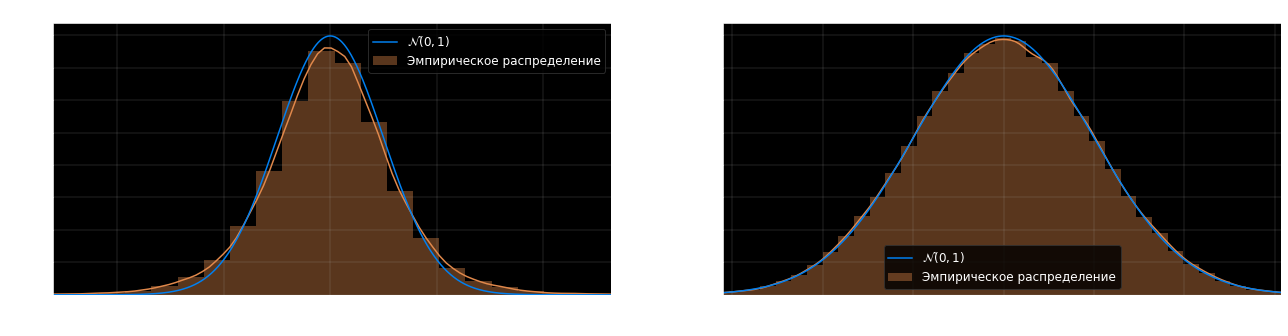

In [8]:
numpy.random.seed(8)

sample_size=7
M = 100000
sample_distr = norm(loc=5, scale=3) # –ü—É—Å—Ç—å –≤—ã–±–æ—Ä–∫–∞ –∏–∑ —ç—Ç–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è

T_X = lambda sample: numpy.sqrt(sample_size) * (numpy.mean(sample) - sample_distr.mean()) / numpy.sqrt(numpy.var(sample, ddof=1)) # –∏–ª–∏ numpy.std
Z_X = lambda sample: numpy.sqrt(sample_size) * (numpy.mean(sample) - sample_distr.mean()) / sample_distr.std()
samples = {
    "T(X)": sample_statistics(
    number_of_experiments=M, statistic_function=T_X,
    sample_size=sample_size, sample_distr=sample_distr),
    
    "Z(X)": sample_statistics(
    number_of_experiments=M, statistic_function=Z_X,
    sample_size=sample_size, sample_distr=sample_distr)
}


pyplot.figure(figsize=(22, 5))

for i, name in enumerate(["T(X)", "Z(X)"]):
    pyplot.subplot(1, 2, i + 1)
    current_sample = samples[name]
    l_bound, r_bound = numpy.quantile(current_sample, [0.001, 0.999])
    
    x = numpy.linspace(l_bound, r_bound, 1000)
    pyplot.title(f'–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ {name}, sample size={sample_size}', fontsize=12)
    distplot(current_sample, label='–≠–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ')
    pyplot.plot(x, norm(0, 1).pdf(x), label='$\mathcal{N}(0, 1)$')
    pyplot.legend(fontsize=12)
    pyplot.xlabel(f'{name}', fontsize=12)
    pyplot.xlim((l_bound, r_bound))
    pyplot.ylabel('–ü–ª–æ—Ç–Ω–æ—Å—Ç—å', fontsize=12)
    pyplot.grid(linewidth=0.2)

pyplot.show()

–ú—ã –≤–∏–¥–∏–º, —á—Ç–æ:
- Z-test —Ç—É—Ç —Ä–∞–±–æ—Ç–∞–µ—Ç: $\sqrt{n}\dfrac{\overline X - \mu_0}{\sqrt{\sigma^2}} \sim \mathcal{N}(0, 1)$.
- –ù–æ –≤–æ—Ç –¥–ª—è $T(X)$ —ç—Ç–æ –Ω–µ —Ç–∞–∫! **–û–Ω–∏ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è! –ê –∑–Ω–∞—á–∏—Ç T'-–∫—Ä–∏—Ç–µ—Ä–∏–π –Ω–µ –ø–æ–¥—Ö–æ–¥–∏—Ç –¥–ª—è –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ–π –∑–∞–¥–∞—á–∏!** 

----

### –ü–æ—á–µ–º—É —Ç–∞–∫–æ–µ –ø—Ä–æ–∏–∑–æ—à–ª–æ?

–ü—Ä–∏ —Å–æ–∑–¥–∞–Ω–∏–∏ –∫—Ä–∏—Ç–µ—Ä–∏—è –µ—Å—Ç—å **2 —à–∞–≥–∞**:
1. –ü—Ä–∏–¥—É–º–∞—Ç—å —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –¥–ª—è –∫—Ä–∏—Ç–µ—Ä–∏—è
    - –° —ç—Ç–∏–º –º—ã —É—Å–ø–µ—à–Ω–æ —Å–ø—Ä–∞–≤–∏–ª–∏—Å—å, –ø—Ä–∏–¥—É–º–∞–≤ $T(X)$.
2. –ü–æ–Ω—è—Ç—å, –∫–∞–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞.
    - –ò –≤–æ—Ç —ç—Ç–æ —Å–∞–º—ã–π —Å–ª–æ–∂–Ω—ã–π —à–∞–≥, –∫–æ—Ç–æ—Ä—ã–π –Ω–µ –ø–æ–∑–≤–æ–ª—è–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ª—é–±—É—é –ø—Ä–∏–¥—É–º–∞–Ω–Ω—É—é —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É. –ù—É–∂–Ω–æ —Ç–∞–∫–∂–µ –ø–æ–Ω–∏–º–∞—Ç—å –µ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ.
    - –ò —Å —ç—Ç–∏–º, –∫–∞–∫ –º—ã —É–≤–∏–¥–µ–ª–∏, –º—ã –ø—Ä–æ–≤–∞–ª–∏–ª–∏—Å—å –¥–ª—è $T(X)$. –ù–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–µ –ø–æ–¥–æ—à–ª–æ.

–ù–æ –ø–æ—á–µ–º—É $T(X) = \sqrt{n}\dfrac{\overline X - \mu}{\sqrt{S^2}}$ –Ω–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ, —Ö–æ—Ç—è $\sqrt{n}\dfrac{\overline X - \mu}{\sqrt{\sigma^2}} \overset{H_0}{\sim} \mathcal{N}(0, 1)$? –ü–æ—á–µ–º—É –ø—Ä–∏ –∑–∞–º–µ–Ω–µ $\sigma^2$ –Ω–∞ $S^2$ –≤—Å–µ –∏—Å–ø–æ—Ä—Ç–∏–ª–æ—Å—å? 

**–î–µ–ª–æ –≤ —Ç–æ–º, —á—Ç–æ $S^2$ &mdash; —ç—Ç–æ —Å–ª—É—á–∞–π–Ω–∞—è –≤–µ–ª–∏—á–∏–Ω–∞!**

–í—Å–ø–æ–º–Ω–∏–º, –∫–∞–∫ –º—ã –≤—ã–≤–æ–¥–∏–ª–∏ Z-–∫—Ä–∏—Ç–µ—Ä–∏–π?
1. –ú—ã –ø–æ—Å—á–∏—Ç–∞–ª–∏, —á—Ç–æ $\overline X \sim \mathcal{N}(\mu, \sigma^2)$. –ò–∑ –¶–ü–¢ –∏–ª–∏, –≤ —Å–ª—É—á–∞–µ –≤—ã—à–µ, –∏–∑ —Å–≤–æ–π—Å—Ç–≤ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.
2. –î–∞–ª–µ–µ, –≤—Å–µ —Ç–∞–∫–∂–µ –∏–∑ —Å–≤–æ–π—Å—Ç–≤ —ç—Ç–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å–ª–µ–¥—É–µ—Ç, —á—Ç–æ –µ—Å–ª–∏ –º—ã –≤—ã—á—Ç–µ–º –∫–æ–Ω—Å—Ç–∞–Ω—Ç—É –∏–ª–∏ –ø–æ–¥–µ–ª–∏–º –Ω–∞ –∫–æ–Ω—Å—Ç–∞–Ω—Ç—É, —Ç–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–µ –ø—Ä–µ–≤—Ä–∞—Ç–∏—Ç—Å—è –≤ –¥—Ä—É–≥–æ–µ: –ø–æ—ç—Ç–æ–º—É $\sqrt{n}\dfrac{\overline X - \mu_0}{\sqrt{\sigma^2}} \sim \mathcal{N}(0, 1)$.

**–ù–æ –º—ã –Ω–∏—á–µ–≥–æ –Ω–µ –∑–Ω–∞–µ–º –ø—Ä–æ** $\dfrac{\overline{X}}{\sqrt{\eta}}$, –≥–¥–µ $\overline{X} \sim \mathcal{N}, S^2 := \eta \sim P$, –≥–¥–µ P –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω–æ. –ú—ã –Ω–µ –∑–Ω–∞–µ–º –ø–æ–∫–∞ –Ω–∏–∫–∞–∫–∏—Ö —Ç–µ–æ—Ä–µ–º, –∫–æ—Ç–æ—Ä—ã–µ —Ö–æ—Ç—å –∫–∞–∫-—Ç–æ –¥–æ–∫–∞–∑—ã–≤–∞–ª–∏, —á—Ç–æ —Ç—É—Ç —Ç–∞–∫–∂–µ –æ—Å—Ç–∞–Ω–µ—Ç—Å—è –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ.

–î–∞–≤–∞–π—Ç–µ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ $\sqrt{S^2}$ –Ω–∞ –≤—Å–µ —Ç–æ–º –∂–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏.

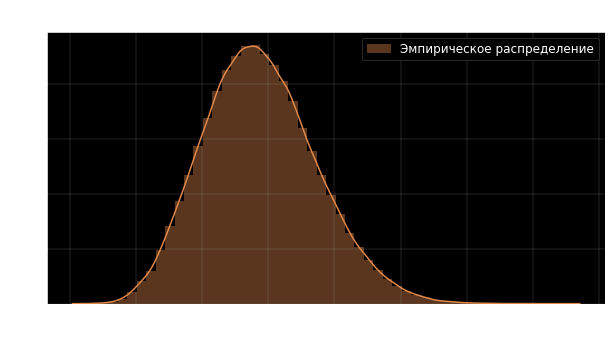

In [9]:
numpy.random.seed(42)


S2 = lambda sample: numpy.std(sample, ddof=1)
S2_sample = sample_statistics(
    number_of_experiments=M, statistic_function=S2,
    sample_size=sample_size, sample_distr=sample_distr
)

pyplot.figure(figsize=(10, 5))
pyplot.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ $\sqrt{S^2}$', fontsize=12)
distplot(S2_sample, label='–≠–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ')
pyplot.legend(fontsize=12)
pyplot.xlabel('$\sqrt{S^2}$', fontsize=12)
pyplot.ylabel('–ü–ª–æ—Ç–Ω–æ—Å—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è', fontsize=12)
pyplot.grid(linewidth=0.2)
pyplot.show()

–ú—ã –≤–∏–¥–∏–º, —á—Ç–æ –æ–Ω–æ –Ω–µ —Å–∏–º–º–µ—Ç—Ä–∏—á–Ω–æ –∏ –Ω–µ–ø–æ–Ω—è—Ç–Ω–æ –∫–∞–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–æ. –ü–æ—ç—Ç–æ–º—É, –∫–æ–≥–¥–∞ –º—ã –Ω–µ–∫—É—é –≤–µ–ª–∏—á–∏–Ω—É –∏–∑ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –¥–µ–ª–∏–º –Ω–∞ –Ω–µ—Å–∏–º–º–µ—Ç—Ä–∏—á–Ω–æ–µ –Ω–µ–ø–æ–Ω—è—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ, –º—ã –∏ –ø–æ–ª—É—á–∞–µ–º, —á—Ç–æ –Ω–∞—à–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ $T$ –Ω–µ –∏–∑ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.

–¢–∞–∫ —á—Ç–æ –¥–∞–≤–∞–π—Ç–µ –≤—ã–≤–µ–¥–µ–º –∫—Ä–∏—Ç–µ—Ä–∏–π, –∫–æ—Ç–æ—Ä—ã–π –ø–æ–º–æ–∂–µ—Ç —Ä–µ—à–∏—Ç—å –∏–∑–Ω–∞—á–∞–ª—å–Ω—É—é –∑–∞–¥–∞—á—É!

## T-test

–î–∞–≤–∞–π—Ç–µ —Ä–µ—à–∏–º –ø—Ä–æ–±–ª–µ–º—É —à–∞–≥–∞ 2 –≤ —Å–æ–∑–¥–∞–Ω–∏–∏ –∫—Ä–∏—Ç–µ—Ä–∏—è –∏ –Ω–∞–π–¥–µ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ $T = \sqrt{n}\dfrac{\overline X - \mu_0}{\sqrt{S^2}}$. –î–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã —ç—Ç–æ —É–∑–Ω–∞—Ç—å, –Ω–∞–º –ø–æ—Ç—Ä–µ–±—É–µ—Ç—Å—è –Ω–µ—Å–∫–æ–ª—å–∫–æ —Ñ–∞–∫—Ç–æ–≤:

1. –ü—É—Å—Ç—å $X_1,\ ... X_n \sim \mathcal{N}(\mu, \sigma^2)$

2. –ü—É—Å—Ç—å $\xi_1,\ ... \xi_n \sim \mathcal{N}(0, 1)$. –¢–æ–≥–¥–∞ $\eta=\xi_1^2 +\ ... +\xi_n^2 \sim \chi^2_n$, &mdash; [**—Ö–∏-–∫–≤–∞–¥—Ä–∞—Ç —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å $n$ —Å—Ç–µ–ø–µ–Ω—è–º–∏ —Å–≤–æ–±–æ–¥—ã**](https://ru.wikipedia.org/wiki/–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ_—Ö–∏-–∫–≤–∞–¥—Ä–∞—Ç).
    - –¢–æ–≥–¥–∞ $\underset{i=1}{\overset{n}{\sum}}\left(\xi_i - \overline \xi \right)^2 \sim \chi^2_{n-1}$. [–î–æ–∫-–≤–æ](https://en.wikipedia.org/wiki/Cochran%27s_theorem) –¥–ª—è –∫—Ä–µ–ø–∫–∏—Ö –¥—É—Ö–æ–º, –∏ –ª—é–±—è—â–∏—Ö –ª–∏–Ω–µ–π–Ω—É—é –∞–ª–≥–µ–±—Ä—É.

    - $S^2_X = \dfrac{1}{n - 1}\underset{i=1}{\overset{n}{\sum}}(X_i - \overline X)^2 $

    - $\xi_i := \dfrac{X_i - \mu}{\sigma} \sim \mathcal{N}(0, 1)$. –¢–æ–≥–¥–∞ $S^2_{\xi} = \dfrac{1}{\sigma^2}S^2_X$.
<!--     $$\begin{align}
    S^2_{\xi} &= \dfrac{1}{n - 1}\underset{i=1}{\overset{n}{\sum}}\left(\xi_i - \overline \xi \right)^2 =
            \dfrac{1}{n - 1}\underset{i=1}{\overset{n}{\sum}} \left(\dfrac{X_i-\mu}{\sigma} - \underset{i=1}{\overset{n}{\sum}}\left[\dfrac{X_i-\mu}{n\sigma}\right] \right)^2 = \\
             &= \dfrac{1}{n - 1}\underset{i=1}{\overset{n}{\sum}} \left(\dfrac{X_i}{\sigma} - \dfrac{\mu}{\sigma} - \underset{i=1}{\overset{n}{\sum}}\left[\dfrac{X_i}{n\sigma}\right] + \dfrac{n\mu}{n\sigma} \right)^2 =\\
             &= \dfrac{1}{n - 1}\underset{i=1}{\overset{n}{\sum}} \left(\dfrac{X_i}{\sigma} -\dfrac{\overline X_i}{\sigma} \right)^2 = \dfrac{1}{\sigma \cdot(n - 1)}\underset{i=1}{\overset{n}{\sum}} \left(X_i - \overline X_i \right)^2 = \dfrac{1}{\sigma}S^2_X
    \end{align}
    $$ -->
    
    - –ê –∑–Ω–∞—á–∏—Ç $\dfrac{(n - 1)\cdot S^2_X}{\sigma^2} = \underset{i=1}{\overset{n}{\sum}}\left(\xi_i - \overline \xi \right)^2 \sim \chi^2_{n-1}$

3. –ü—É—Å—Ç—å $\xi \sim \mathcal{N}(0, 1), \eta \sim \chi^2_k$ –∏ $\xi$ —Å $\eta$ –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã. –¢–æ–≥–¥–∞ —Å—Ç–∞—Ç–∏—Å–∏–∫–∞ $\zeta = \dfrac{\xi}{\sqrt{\eta/k}} \sim t_{k}$ &mdash; –∏–∑ [—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –°—Ç—å—é–¥–µ–Ω—Ç–∞](https://ru.wikipedia.org/wiki/–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ_–°—Ç—å—é–¥–µ–Ω—Ç–∞) —Å k —Å—Ç–µ–ø–µ–Ω—è–º–∏ —Å–≤–æ–±–æ–¥—ã.
 
    - $\xi := \sqrt{n}\dfrac{\overline X - \mu_0}{\sigma} \sim \mathcal{N}(0, 1)$
    - $\eta := \dfrac{(n - 1)\cdot S^2_X}{\sigma^2} \sim \chi^2_{n-1}$
    - $\xi$ –∏ $\eta$ [–Ω–µ–∑–∞–≤–∏—Å–∏–º—ã](https://math.stackexchange.com/questions/4165803/overlinex-and-s2-are-independent)
    - –¢–æ–≥–¥–∞
    $$\begin{align}
        T = \sqrt{n}\dfrac{\overline X - \mu_0}{\sqrt{S^2}} = \frac{\sqrt{n}\dfrac{\overline X - \mu_0}{\sigma}}{\sqrt{\dfrac{(n - 1)\cdot S^2_X}{(n - 1)\sigma^2}}} = \dfrac{\xi}{\sqrt{\dfrac{\eta}{n-1}}} \sim t_{n - 1}
    \end{align}$$

**–ò—Ç–æ–≥–æ:**

–ü—Ä–∏–¥—É–º–∞–Ω–Ω–∞—è –Ω–∞–º–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ $T = \sqrt{n}\dfrac{\overline X - \mu_0}{\sqrt{S^2}} \sim t_{n - 1}$ &mdash; –≤–∑—è—Ç–∞ –∏–∑ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –°—Ç—å—é–¥–µ–Ω—Ç–∞ —Å n - 1 —Å—Ç–µ–ø–µ–Ω—å—é —Å–≤–æ–±–æ–¥—ã. **–ù–æ —Ç–æ–ª—å–∫–æ –≤ —Å–ª—É—á–∞–µ, –µ—Å–ª–∏ –∏–∑–Ω–∞—á–∞–ª—å–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞ –∏–∑ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è!**

–¢–µ–ø–µ—Ä—å –Ω–∞–º –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –¥–∞–Ω–Ω—ã—Ö, —á—Ç–æ–±—ã –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –∫—Ä–∏—Ç–µ—Ä–∏–π –¥–ª—è –Ω–∞—à–µ–π –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ–π –∑–∞–¥–∞—á–∏:

### T-test, –∫—Ä–∏—Ç–µ—Ä–∏–π

$H_0: \mu =\mu_0, X \sim \mathcal{N}\ vs.\ H_1: \mu > \mu_0$ –∏–ª–∏ $X$ –Ω–µ –∏–∑ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
- –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ $T(X) = \sqrt{n}\dfrac{\overline X - \mu_0}{\sqrt{S^2}}$
- $T(X)  \sim t_{n - 1}$
- –û–¥–Ω–æ—Å—Ç–æ—Ä–æ–Ω–Ω–∏–π –∫—Ä–∏—Ç–µ—Ä–∏–π: $\left\{T(X) \geq t_{n-1, 1 - \alpha} \right\}$
    - p-value = $1 - \tau_{n-1}(z)$, –≥–¥–µ z &mdash; —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ $T(X)$, $\tau_{n-1}(z)$ &mdash; —Ñ—É–Ω–∫—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è $t_{n - 1}$
- –î–≤—É—Å—Ç–æ—Ä–æ–Ω–Ω–∏–π –∫—Ä–∏—Ç–µ—Ä–∏–π: $\left\{T(X) \geq t_{n-1, 1 - \frac{\alpha}{2}} \right\} \bigcup \left\{T(X) \leq -t_{n-1, 1 - \frac{\alpha}{2}} \right\} $
    - p-value = $2\cdot \min \left[{\tau_{n-1}(z), 1 - \tau_{n-1}(z)} \right]$, –≥–¥–µ z &mdash; —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ $T(X)$
---

–î–∞–≤–∞–π—Ç–µ —Ç–µ–ø–µ—Ä—å –ø—Ä–æ—Ç–µ—Å—Ç–∏—Ä—É–µ–º –≤—Å–µ –Ω–∞—à–∏ —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∏–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ!

#### Python-–±–∏–±–ª–∏–æ—Ç–µ–∫–∏:
- `scipy.stats.chi2(df=N)` &mdash; [–±–∏–±–ª–∏–æ—Ç–µ–∫–∞](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html) –¥–ª—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ö–∏-–∫–≤–∞–¥—Ä–∞—Ç —Å N —Å—Ç–µ–ø–µ–Ω—è–º–∏ —Å–≤–æ–±–æ–¥—ã.
- `scipy.stats.t(df=N)` &mdash; [–±–∏–±–ª–∏–æ—Ç–µ–∫–∞](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html) –¥–ª—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –°—Ç—å—é–¥–µ–Ω—Ç–∞ —Å N —Å—Ç–µ–ø–µ–Ω—è–º–∏ —Å–≤–æ–±–æ–¥—ã.
- `scipy.stats.ttest_1samp`  &mdash; [—Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω–Ω—ã–π T-–∫—Ä–∏—Ç–µ—Ä–∏–π](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html) –≤ Python


–î–ª—è –Ω–∞—á–∞–ª–∞ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –•–∏ –∫–≤–∞–¥—Ä–∞—Ç –∏ –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ $\eta$.

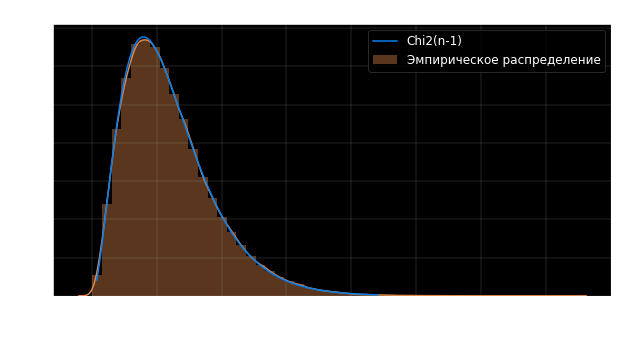

In [10]:
numpy.random.seed(42)


eta_statistic = lambda sample: numpy.var(sample, ddof=1) * (sample_size - 1) / sample_distr.var()
eta_sample = sample_statistics(
    number_of_experiments=M, statistic_function=eta_statistic,
    sample_size=sample_size, sample_distr=sample_distr
)


chi2_dist = chi2(df=sample_size-1) # –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ chi2

l_bound, r_bound = numpy.quantile(eta_sample, [0.001, 0.999])
x = numpy.linspace(l_bound, r_bound, 1000)

pyplot.figure(figsize=(10, 5))
pyplot.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ $\eta$', fontsize=12)
distplot(eta_sample, label='–≠–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ')
pyplot.plot(x, chi2_dist.pdf(x), label='Chi2(n-1)')
pyplot.legend(fontsize=12)
pyplot.xlabel('$\eta$', fontsize=12)
pyplot.ylabel('–ü–ª–æ—Ç–Ω–æ—Å—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è', fontsize=12)
pyplot.grid(linewidth=0.2)
pyplot.show()

–í–∏–¥–∏–º, —á—Ç–æ –≤—Å–µ —Å–æ–≤–ø–∞–ª–æ!

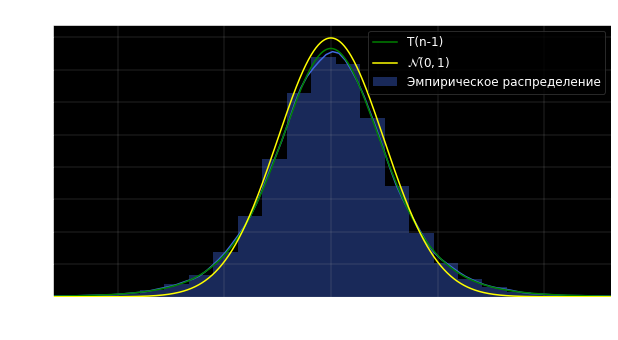

In [10]:
numpy.random.seed(42)


T_X = lambda sample: numpy.sqrt(sample_size) * (numpy.mean(sample) - sample_distr.mean()) / numpy.std(sample, ddof=1)
T_sample = sample_statistics(
    number_of_experiments=M, statistic_function=T_X,
    sample_size=sample_size, sample_distr=sample_distr
)


T_dist = t(df=sample_size-1) # –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ T –°—Ç—å—é–¥–µ–Ω—Ç–∞

l_bound, r_bound = numpy.quantile(T_sample, [0.001, 0.999])
x = numpy.linspace(l_bound, r_bound, 1000)

pyplot.figure(figsize=(10, 5))
pyplot.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ $T(X)$', fontsize=12)
distplot(T_sample, color='royalblue', label='–≠–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ')
pyplot.plot(x, T_dist.pdf(x), c='green', label='T(n-1)')
pyplot.plot(x, norm(0, 1).pdf(x), c='yellow', label='$\mathcal{N}(0, 1)$')
pyplot.legend(fontsize=12)
pyplot.xlabel('$T(X)$', fontsize=12)
pyplot.ylabel('–ü–ª–æ—Ç–Ω–æ—Å—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è', fontsize=12)
pyplot.xlim((l_bound, r_bound))
pyplot.grid(linewidth=0.2)
pyplot.show()

–ó–¥–µ—Å—å –≤–∏–¥–Ω–æ, —á—Ç–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –°—Ç—å—é–¥–µ–Ω—Ç–∞ –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –∏–¥–µ–∞–ª—å–Ω–æ –æ–ø–∏—Å—ã–≤–∞–µ—Ç –¥–∞–Ω–Ω—ã–µ, –≤ —Ç–æ –≤—Ä–µ–º—è –∫–∞–∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –±–æ–ª–µ–µ "—Ü–µ–Ω—Ç—Ä–∏—Ä–æ–≤–∞–Ω–æ": –ø–ª–æ—â–∞–¥—å –≤ —Ü–µ–Ω—Ç—Ä–µ –±–æ–ª—å—à–µ.

–¢–µ–ø–µ—Ä—å, –∫–∞–∫ –≤—ã–∑–≤–∞—Ç—å –≤—Å—Ç—Ä–æ–µ–Ω–Ω—ã–π t-test –≤ –ü–∏—Ç–æ–Ω–µ:


In [11]:
# –ö–∞–∫ –≤—ã–∑—ã–≤–∞—Ç—å –∫—Ä–∏—Ç–µ—Ä–∏–π
ttest_1samp(norm(loc=0, scale=1).rvs(100), popmean=-1, alternative='greater')

Ttest_1sampResult(statistic=11.510815172646131, pvalue=2.8759451265260583e-20)

### –î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª

–ë—É–¥–µ—Ç –ø—Ä–∏–≤–µ–¥–µ–Ω–æ 2 –º–µ—Ç–æ–¥–∞ –≤—ã–≤–æ–¥–∞ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞.

#### 1 –º–µ—Ç–æ–¥

–í—Å–ø–æ–º–Ω–∏–º –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏–∑ –≤—Ç–æ—Ä–æ–π –ª–µ–∫—Ü–∏–∏:

> –ü—É—Å—Ç—å –µ—Å—Ç—å —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ $Q$ –∏ –∫—Ä–∏—Ç–µ—Ä–∏–π $\psi(Q)$ –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –≥–∏–ø–æ—Ç–µ–∑—ã $H_0: \theta = m$ —É—Ä–æ–≤–Ω—è –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ $\alpha$.
>
> –¢–æ–≥–¥–∞ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è $\theta$ —É—Ä–æ–≤–Ω—è –¥–æ–≤–µ—Ä–∏—è $1 - \alpha$: –º–Ω–æ–∂–µ—Å—Ç–≤–æ —Ç–∞–∫–∏—Ö m, —á—Ç–æ –∫—Ä–∏—Ç–µ—Ä–∏–π $\psi(Q)$ –Ω–µ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç –¥–ª—è –Ω–∏—Ö $H_0$.


–ü—É—Å—Ç—å $\mu$ &mdash; –∏—Å—Ç–∏–Ω–Ω–æ–µ —Å—Ä–µ–¥–Ω–µ–µ –≤—ã–±–æ—Ä–∫–∏. –ú—ã —Ç–∞–∫–∂–µ –∑–Ω–∞–µ–º, —á—Ç–æ –ø—Ä–∏ $H_0: \sqrt{n}\dfrac{\overline X - m}{\sqrt{S^2}} \sim t_{n - 1}$.

–ù–∞—Å –∏–Ω—Ç–µ—Ä–µ—Å—É—é—Ç —Ç–∞–∫–∏–µ $m$, —á—Ç–æ:  $\left\{-t_{n-1, 1 - \frac{\alpha}{2}} < \sqrt{n}\dfrac{\overline X - m}{\sqrt{S^2}} < t_{n-1, 1 - \frac{\alpha}{2}} \right\}$, –≤ —ç—Ç–æ–º —Å–ª—É—á–∞–µ –∫—Ä–∏—Ç–µ—Ä–∏–π –Ω–µ –æ—Ç–≤–µ—Ä–≥–Ω–µ—Ç—Å—è.

–†–∞—Å–ø–∏—à–µ–º, —á—Ç–æ–±—ã –≤ —Ü–µ–Ω—Ç—Ä–µ –æ—Å—Ç–∞–ª–æ—Å—å —Ç–æ–ª—å–∫–æ $m$: $\left\{\overline X - \dfrac{t_{n - 1, 1 - \alpha/2} \sqrt{S^2}}{\sqrt{n}} < m < \overline X + \dfrac{t_{n - 1, 1 - \alpha/2} \sqrt{S^2}}{\sqrt{n}}\right\}$. –ê –∑–Ω–∞—á–∏—Ç –Ω–∞—à –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª: $CI_{\mu} = \left(\overline X \pm \dfrac{t_{n - 1, 1 - \alpha/2} \sqrt{S^2}}{\sqrt{n}} \right),$ –≥–¥–µ $S^2 = \dfrac{1}{n - 1}\underset{i=1}{\overset{n}{\sum}}(X_i - \overline X)^2$.

### 2 –º–µ—Ç–æ–¥

–î–æ–∫–∞–∂–µ–º —á–µ—Ä–µ–∑ [–∫–ª–∞—Å—Å–∏—á–µ—Å–∫–µ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ](https://ru.wikipedia.org/wiki/–î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π_–∏–Ω—Ç–µ—Ä–≤–∞–ª#–û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ) –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞.

> –î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–º –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–º –¥–ª—è –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ $\theta$ —É—Ä–æ–≤–Ω—è –¥–æ–≤–µ—Ä–∏—è $1 - \alpha$ —è–≤–ª—è–µ—Ç—Å—è –ø–∞—Ä–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫ $L(X), R(X)$, —Ç–∞–∫–∏—Ö, —á—Ç–æ $P(L(X) < \theta < R(X)) = 1 - \alpha$.

$$\begin{align}
    &T(X) = \sqrt{n}\dfrac{\overline X - \mu}{\sqrt{S^2}} \sim t_{n - 1} \Rightarrow \\
    &P\left(-t_{n - 1, 1-\alpha/2} < \sqrt{n}\dfrac{\overline X - \mu}{\sqrt{S^2}} < t_{n - 1, 1-\alpha/2} \right) = 1 - \alpha \Leftrightarrow \\
    &P\left(\overline X - \dfrac{t_{n - 1, 1 - \alpha/2} \sqrt{S^2}}{\sqrt{n}}  < \mu < \overline X + \dfrac{t_{n - 1, 1 - \alpha/2} \sqrt{S^2}}{\sqrt{n}} \right) = 1 - \alpha
\end{align}
$$


–ê –∑–Ω–∞—á–∏—Ç $CI_{\mu} = \left(\overline X \pm \dfrac{t_{n - 1, 1 - \alpha/2} \sqrt{S^2}}{\sqrt{n}} \right)$. 

*–ö–∞–∫ –≤—ã –≤–∏–¥–∏—Ç–µ, –¥–æ–∫–∞–∑–∞—Ç–µ–ª—å—Å—Ç–≤–∞ –≤ –æ–±–æ–∏—Ö —Å–ª—É—á–∞—è—Ö –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –∏–¥–µ–Ω—Ç–∏—á–Ω—ã.*


–í –ü–∏—Ç–æ–Ω–µ –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –µ—Å—Ç—å —Å–ø–µ—Ü–∏–∞–ª—å–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è:

In [12]:
sample = norm(loc=10, scale=2).rvs(100)

# sem -- standart error of the mean, sem = sqrt(S^2)/sqrt(n)
left_bound, right_bound = t.interval(alpha=0.95, loc=numpy.mean(sample), df=len(sample)-1, scale=sem(sample)) 
print(f"CI = [{round(left_bound, 2)}, {round(right_bound, 2)}]")

CI = [9.62, 10.39]


-----

–í–µ—Ä–Ω–µ–º—Å—è –∫ –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ–π –∑–∞–¥–∞—á–µ. 
> üìà **–ó–∞–¥–∞—á–∞**
>
> –í –Ω–∞—à–µ–π –∫–æ–º–ø–∞–Ω–∏–∏ —Ö–æ—Ç—è—Ç –ø–µ—Ä–µ–π—Ç–∏ —Å –æ–¥–Ω–æ–π –°–£–ë–î –Ω–∞ –¥—Ä—É–≥—É—é. –ì–ª–∞–≤–Ω—ã–º –∫—Ä–∏—Ç–µ—Ä–∏–µ–º –¥–ª—è –ø–µ—Ä–µ—Ö–æ–¥—è —è–≤–ª—è–µ—Ç—Å—è "–∑–∞—Ç—Ä–∞—á–µ–Ω–Ω–æ–µ –≤—Ä–µ–º—è –≤ —Å—É—Ç–∫–∞—Ö –Ω–∞ –∑–∞–≥—Ä—É–∑–∫—É –Ω–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö". –ï—Å–ª–∏ —Ä–∞–Ω—å—à–µ –¥–ª—è –µ–∂–µ–¥–Ω–µ–≤–Ω–æ–≥–æ –æ–±–Ω–æ–≤–ª–µ–Ω–∏—è –±–∞–∑—ã —Ç—Ä–µ–±–æ–≤–∞–ª–æ—Å—å –≤ —Å—Ä–µ–¥–Ω–µ–º 10 —á–∞—Å–æ–≤, —Ç–æ —Ö–æ—á–µ—Ç—Å—è –Ω–∞–π—Ç–∏ –Ω–æ–≤—É—é –°–£–ë–î, –≤ –∫–æ—Ç–æ—Ä–æ–π –≤—Å–µ —ç—Ç–æ –±—É–¥–µ—Ç –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç—å –±—ã–≤—Å—Ç—Ä–µ–µ, —á–µ–º –∑–∞ 7 —á–∞—Å–æ–≤.
>
> –î–ª—è —ç—Ç–æ–≥–æ –±—ã–ª–æ –ø—Ä–∏–Ω—è—Ç–æ —Ä–µ—à–µ–Ω–∏–µ –ø–µ—Ä–µ–Ω–µ—Å—Ç–∏ –≤—Å–µ –¥–∞–Ω–Ω—ã–µ –Ω–∞ –Ω–æ–≤—É—é —Ç–µ—Å—Ç–∏—Ä—É–µ–º—É—é –°–£–ë–î. –í —Ç–µ—á–µ–Ω–∏–µ –æ–¥–Ω–æ–π –Ω–µ–¥–µ–ª–∏ –∫–∞–∂–¥—ã–π –¥–µ–Ω—å –º—ã –ø–æ—Å—á–∏—Ç–∞–µ–º –≤—Ä–µ–º—è –∑–∞–≥—Ä—É–∑–∫–∏ –¥–∞–Ω–Ω—ã—Ö, –∏ –µ—Å–ª–∏ –≤ —Å—Ä–µ–¥–Ω–µ–º –Ω–∞ –æ–±–Ω–æ–≤–ª–µ–Ω–∏–µ –±—É–¥–µ—Ç —É—Ö–æ–¥–∏—Ç—å –º–µ–Ω—å—à–µ 7 —á–∞—Å–æ–≤, —Ç–æ –º—ã –ø–æ–ª–Ω–æ—Å—Ç—å—é –ø–µ—Ä–µ–π–¥–µ–º –Ω–∞ –Ω–æ–≤—É—é –°–£–ë–î. –í–∞—à–∞ –∑–∞–¥–∞—á–∞ –ø—Ä–∏–¥—É–º–∞—Ç—å, –∫–∞–∫ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –≥–∏–ø–æ—Ç–µ–∑—É –æ —Ç–æ–º, —á—Ç–æ –Ω–æ–≤–∞—è –°–£–ë–î –ª—É—á—à–µ —Å—Ç–∞—Ä–æ–π.

–ü–æ–ª—É—á–∏–ª–∞—Å—å –≤—ã–±–æ—Ä–∫–∞:

- `[6.9, 6.45, 6.32, 6.88, 6.19, 7.13, 6.76]` &mdash; –≤—Ä–µ–º—è –∑–∞–≥—Ä—É–∑–∫–∏ –≤ –Ω–æ–≤—É—é –ë–î –ø–æ –¥–Ω—è–º –≤ —á–∞—Å–∞—Ö.

–î–ª—è –Ω–∞—á–∞–ª–∞ –ø–µ—Ä–µ—Ñ–æ—Ä–º—É–ª–∏—Ä—É–µ–º —É—Å–ª–æ–≤–∏–µ –Ω–∞ —è–∑—ã–∫–µ –º–∞—Ç–µ–º–∞—Ç–∏–∫–∏: –µ—Å—Ç—å –≤—ã–±–æ—Ä–∫–∞
- $X_1, X_2, ..., X_7$ &mdash; –≤—Ä–µ–º—è –∑–∞–≥—Ä—É–∑–∫–∏ –≤ —á–∞—Å–∞—Ö –Ω–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö –≤ –°–£–ë–î –∑–∞ –∫–∞–∂–¥—ã–π –¥–µ–Ω—å —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞
- –ï—â–µ –±—É–¥–µ–º —Å—á–∏—Ç–∞—Ç—å, —á—Ç–æ $X$ –∏–∑ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–Ω–∏—è.

$H_0$: $E \overline{X} \leq 7\ vs.\ H_1: E \overline{X} > 7$



–ú—ã —É–∂–µ –∑–Ω–∞–µ–º, —á—Ç–æ –µ—Å–ª–∏ –≤—ã–±–æ—Ä–∫–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–∞, —Ç–æ –º—ã –º–æ–∂–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å T-test. –¢–æ–≥–¥–∞



In [13]:
X = numpy.array([6.9, 6.45, 6.32, 6.88, 6.09, 7.13, 6.76])

In [14]:
ttest_1samp(X, popmean=7, alternative='less')

Ttest_1sampResult(statistic=-2.5247934680450737, pvalue=0.022497429172957096)

–ú—ã –≤–∏–¥–∏–º, —á—Ç–æ –Ω–∞ —É—Ä–æ–≤–Ω–µ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ 2.5% –∫—Ä–∏—Ç–µ—Ä–∏–π –æ—Ç–≤–µ—Ä–≥—Å—è, –∞ –∑–Ω–∞—á–∏—Ç –ø–µ—Ä–µ—Ö–æ–¥ –Ω–∞ –Ω–æ–≤—É—é –°–£–ë–î —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—è–µ—Ç —É—Å–ª–æ–≤–∏—è–º: –∑–∞–≥—Ä—É–∑–∫–∞ –±—ã—Å—Ç—Ä–µ–µ 7 —á–∞—Å–æ–≤!
–ü–æ—Å—Ç—Ä–æ–∏–º —Ç–µ–ø–µ—Ä—å –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª, —á—Ç–æ–±—ã –ø–æ–Ω—è—Ç—å, –≤ –∫–∞–∫–∏—Ö –≥—Ä–∞–Ω–∏—Ü–∞—Ö —É –Ω–∞—Å –±—É–¥–µ—Ç —ç—Ñ—Ñ–µ–∫—Ç.

In [15]:
left_bound, right_bound = t.interval(alpha=0.95, loc=numpy.mean(X), df=len(X)-1, scale=sem(X)) 
print(f"CI = [{round(left_bound, 2)}, {round(right_bound, 2)}]")

CI = [6.31, 6.99]


–û—Ç–ª–∏—á–Ω–æ! –í —Å—Ä–µ–¥–Ω–µ–º –∑–∞–≥—Ä—É–∑–∫–∞ –±—É–¥–µ—Ç –æ—Ç 6 –¥–æ 7 —á–∞—Å–æ–≤.

----

–¢–∞–∫, –º—ã –Ω–∞—É—á–∏–ª–∏—Å—å —Ä–µ—à–∞—Ç—å –∑–∞–¥–∞—á—É –æ—Ü–µ–Ω–∫–∏ —Å—Ä–µ–¥–Ω–µ–≥–æ –≤—ã–±–æ—Ä–∫–∏, –∫–æ–≥–¥–∞ –¥–∏—Å–ø–µ—Ä—Å–∏—è –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω–∞, –Ω–æ –≤—ã–±–æ—Ä–∫–∞ –∏–∑ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è. –¢–µ–ø–µ—Ä—å –Ω–∞—É—á–∏–º—Å—è —Ä–µ—à–∞—Ç—å —Å–ª–µ–¥—É—é—â—É—é –∑–∞–¥–∞—á—É:


> üìà **–ó–∞–¥–∞—á–∞**
>
> –í—ã –ø—Ä–∏–¥—É–º–∞–ª–∏ –∏–¥–µ—é –¥–ª—è —Å—Ç–∞—Ä—Ç–∞–ø–∞ –≤ –ú–æ—Å–∫–≤–µ, –≥–¥–µ –∫—É—Ä—å–µ—Ä—ã —Å–æ–±–∏—Ä–∞—é—Ç –∑–∞–∫–∞–∑—ã –¥–ª—è –∫–ª–∏–µ–Ω—Ç–æ–≤ –∏ –æ—Ç–≤–æ–∑—è—Ç –∏–º –Ω–∞ –¥–æ–º. –ú–∞—Ä–∂–∞ –æ—Ç –∑–∞–∫–∞–∑–∞ –≤ –≤–∞—à–µ–º —Å—Ç–∞—Ä—Ç–∞–ø–µ &mdash; X ‚ÇΩ, –∞ —Å—Ç–æ–∏–º–æ—Å—Ç—å —Ä–∞–±–æ—Ç—ã –∫—É—Ä—å–µ—Ä–∞ &mdash; 1–ö ‚ÇΩ.
–°–ø–µ—Ü–∏—Ñ–∏–∫–∞ –≤–∞—à–µ–≥–æ —Å—Ç–∞—Ä—Ç–∞–ø–∞ —Ç–∞–∫–æ–≤–∞, —á—Ç–æ –µ—Å—Ç—å –±–æ–ª—å—à–æ–π —Ä–∏—Å–∫ –≤–æ–∑–≤—Ä–∞—Ç–∞ –±–µ–∑ –æ–ø–ª–∞—Ç—ã. –° —É—á–µ—Ç–æ–º —Å—Ç–æ–∏–º–æ—Å—Ç–µ–π, –∏–Ω–≤–µ—Å—Ç–æ—Ä—ã –≥–æ—Ç–æ–≤—ã –ø—Ä–æ—Å–ø–æ–Ω—Å–∏—Ä–æ–≤–∞—Ç—å –≤–∞–º –∏–Ω—Ñ—Ä–∞—Å—Ç—Ä—É–∫—Ç—É—Ä—É –∏ –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏–µ –∫–ª–∏–µ–Ω—Ç–æ–≤, –µ—Å–ª–∏ –≤—ã –ø–æ–∫–∞–∂–µ—Ç–µ, —á—Ç–æ —É –≤–∞—Å –±—É–¥–µ—Ç –ø—Ä–∏–±—ã–ª—å.
>
> –ò–∑ –¥–∞–Ω–Ω—ã—Ö —É –≤–∞—Å –µ—Å—Ç—å –ø—Ä–∏–Ω–µ—Å–µ–Ω–Ω—ã–µ –¥–µ–Ω—å–≥–∏ –æ—Ç –∫–∞–∂–¥–æ–≥–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è. –ò–Ω–æ–≥–¥–∞ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è –≤–µ–ª–∏—á–∏–Ω–∞, –∏–Ω–æ–≥–¥–∞ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–∞—è.

–ü–µ—Ä–µ—Ñ–æ—Ä–º—É–ª–∏—Ä—É–µ–º –∑–∞–¥–∞—á—É –Ω–∞ —è–∑—ã–∫–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏:
- $X_1, X_2, ..., X_N$ &mdash; –≤—ã–±–æ—Ä–∫–∞ –ø—Ä–∏–±—ã–ª–∏ –æ—Ç –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è.

$H_0$: $E \overline{X} \leq 0\ vs.\ H_1: E \overline{X} > 0$

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –¥–∞–Ω–Ω—ã–µ:

In [16]:
profits = numpy.loadtxt('profit_from_user.out', delimiter=',')
print(profits[:100])

[-718.  657.  693.  391. -644.  421.  265. -108. 1956. -684. -753. -725.
 -341. -796. -662.  257. -719. 5184. -739. -291. -427.  283.   10.  500.
 -713. -458.   60. -756.  333. -537. -744.  254. -555. -780. -329. -560.
  936. -742. -784.  213.  299. -678. -736.   24.  264.  293. -490. 2667.
 -605. -799. -797. -743.  347. -718. -508. -766. 1395.  392.  -62. -510.
  237. -785. -745. -781. 3232. -727.  204. 2987.  244. -757.  -78.   10.
  364.   -7. -440.  520.  203.  282.  685.  589. -724.  -48.  263. -457.
 -796. -708. -798.  488. -677. -690.  786. -770.  659. -679. -309. -731.
  288. 1047. -796. -721.]


In [17]:
print(f"average profit = {profits.mean()}")
print(f"n = {profits.shape[0]}")

average profit = 58.4868
n = 5000


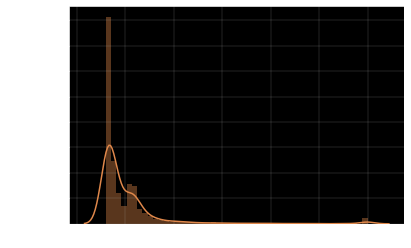

In [18]:
seaborn.distplot(profits)
pyplot.grid(linewidth=0.2)


–í –æ—Ç–ª–∏—á–∏–µ –æ—Ç –ø—Ä–µ–¥—ã–¥—É—â–µ–π –∑–∞–¥–∞—á–∏ —Ç—É—Ç 2 –æ—Ç–ª–∏—á–∏—è:
- –ò–∑–Ω–∞—á–∞–ª—å–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞ –Ω–µ –∏–∑ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
- –í—ã–±–æ—Ä–∫–∞ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –∫—Ä—É–ø–Ω–∞—è: –Ω–µ 7 —ç–ª–µ–º–µ–Ω—Ç–æ–≤, –∞ —É–∂–µ 5000.

–¢–∞–∫, –∞ —á—Ç–æ –º—ã —É–∂–µ —É–º–µ–µ–º —Ä–µ—à–∞—Ç—å?


|                          | –º–∞–ª–µ–Ω—å–∫–∞—è –≤—ã–±–æ—Ä–∫–∞ | –±–æ–ª—å—à–∞—è –≤—ã–±–æ—Ä–∫–∞ |
|--------------------------|-------------------|-----------------|
| –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ | t-test            | t-test          |
| –ª—é–±–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ      |                   |                 |

–ê —Å–µ–π—á–∞—Å –º—ã –≤—ã–≤–µ–¥–µ–º –∫—Ä–∏—Ç–µ—Ä–∏–π –¥–ª—è —è—á–µ–π–∫–∏: "–ª—é–±–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ, –±–æ–ª—å—à–∞—è –≤—ã–±–æ—Ä–∫–∞". –ú—ã —Å–Ω–æ–≤–∞ –±—É–¥–µ–º –≤—ã–≤–æ–¥–∏—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è $T(X)$ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏.


## T'-test

–í—Å–ø–æ–Ω–∏–º, —á—Ç–æ —É –Ω–∞—Å –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ –±—ã–ª–∞ –∏–¥–µ—è –≤ Z-—Ç–µ—Å—Ç–µ –≤–º–µ—Å—Ç–æ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ Z, –≤ –∫–æ—Ç–æ—Ä–æ–π –¥–∏—Å–ø–µ—Ä—Å–∏—è –∏–∑–≤–µ—Å—Ç–Ω–∞, –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∫—Ä–∏—Ç–µ—Ä–∏–π T, –≥–¥–µ –¥–∏—Å–ø–µ—Ä—Å–∏—è –æ—Ü–µ–Ω–µ–Ω–∞ –Ω–∞ –¥–∞–Ω–Ω—ã—Ö. –ò –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ. –¢–æ–ª—å–∫–æ –≤ –ø–µ—Ä–≤–æ–π –∑–∞–¥–∞—á–µ —ç—Ç–æ—Ç –∫—Ä–∏—Ç–µ—Ä–∏–π –Ω–∞–º –Ω–µ –ø–æ–º–æ–≥. –ù–æ —á—Ç–æ, –µ—Å–ª–∏ –±—ã –≤—ã–±–æ—Ä–∫–∞ –±—ã–ª–∞ –±–æ–ª—å—à–æ–π? –ú–æ–≥–ª–∏ –±—ã –º—ã –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è?


1. –ë—É–¥–µ–º —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—Ç—å —Ç—É –∂–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É $T = \sqrt{n}\dfrac{\overline X - \mu_0}{\sqrt{S^2}}$
2. $\xi := \sqrt{n}\dfrac{\overline X - \mu_0}{\sqrt{\sigma^2}} \stackrel{d}{\rightarrow} \mathcal{N}(0, 1)$. –ü–æ –¶–ü–¢ —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å –µ—Å—Ç—å —Ç–æ–ª—å–∫–æ –ø–æ [—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é](https://en.wikipedia.org/wiki/Convergence_in_distribution).
3. –¢–æ–≥–¥–∞ $T = \sqrt{n}\dfrac{\overline X - \mu_0}{\sqrt{S^2}} = \xi \cdot \sqrt{\dfrac{\sigma^2}{S^2}}$. –û–±–æ–∑–Ω–∞—á–∏–º $\phi := \sqrt{\dfrac{\sigma^2}{S^2}}$
    - –ü–æ–º–Ω–∏—Ç–µ, –≤ –Ω–∞—á–∞–ª–µ –ª–µ–∫—Ü–∏–∏ –±—ã–ª–æ —Å–∫–∞–∑–∞–Ω–æ, —á—Ç–æ $S^2$ &mdash; –ª—É—á—à–∞—è –æ—Ü–µ–Ω–∫–∞ –¥–ª—è –¥–∏—Å–ø–µ—Ä—Å–∏–∏? –í—Å–µ –¥–µ–ª–æ –≤ —Ç–æ–º, —á—Ç–æ –æ–Ω–∞ —è–≤–ª—è–µ—Ç—Å—è [—Å–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ–π –æ—Ü–µ–Ω–∫–æ–π](https://ru.wikipedia.org/wiki/–°–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–∞—è_–æ—Ü–µ–Ω–∫–∞) $\sigma^2$. –ü–æ –¥—Ä—É–≥–æ–º—É —ç—Ç–æ –º–æ–∂–Ω–æ –∑–∞–ø–∏—Å–∞—Ç—å —Ç–∞–∫: $S^2$ [—Å—Ö–æ–¥–∏—Ç—Å—è –ø–æ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏](https://en.wikipedia.org/wiki/Convergence_of_random_variables#Convergence_in_probability) –∫ $\sigma^2$. –¢–æ –µ—Å—Ç—å $S^2  \stackrel{p}{\rightarrow} \sigma^2$ 
    - –ê –≤ —ç—Ç–æ–º —Å–ª—É—á–∞–µ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç [—Ç–µ–æ—Ä–µ–º–∞](https://en.wikipedia.org/wiki/Continuous_mapping_theorem), —É—Ç–≤–µ—Ä–∂–¥–∞—é—â–∞—è, —á—Ç–æ $\phi = \dfrac{\sigma^2}{S^2}  \stackrel{p}{\rightarrow} 1$.
4. $T = \xi \cdot \phi$.
    - $\xi \stackrel{d}{\rightarrow} \mathcal{N}(0, 1)$
    - $\phi  \stackrel{p}{\rightarrow} 1$
    - –ò —Ç—É—Ç –≤—Å—Ç—É–ø–∞–µ—Ç –≤ —Å–∏–ª—É –µ—â–µ –æ–¥–Ω–∞ [—Ç–µ–æ—Ä–µ–º–∞](https://en.wikipedia.org/wiki/Slutsky%27s_theorem): $T = \xi \cdot \phi \stackrel{d}{\rightarrow} 1\cdot \mathcal{N}(0, 1)$. –¢–∞ –∂–µ —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å, —á—Ç–æ –∏ –≤ –¶–ü–¢!
    - **–¢–æ –µ—Å—Ç—å —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ $T$ —Ç–æ—á–Ω–æ —Ç–∞–∫–∂–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∞!**
    
    
–ò—Ç–æ–≥–æ, –µ—Å–ª–∏ –≤—ã–±–æ—Ä–∫–∞ –±–æ–ª—å—à–∞—è, —Ç–æ –º—ã –º–æ–∂–µ–º —Å—á–∏—Ç–∞—Ç—å, —á—Ç–æ $T(X) \overset{H_0}{\sim} \mathcal{N}(0, 1)$.

---

–ó–∞–º–µ—Ç–∏–º, —á—Ç–æ –≤ —Å–ª—É—á–∞–µ "–Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ, –±–æ–ª—å—à–∞—è –≤—ã–±–æ—Ä–∫–∞" —Ä–∞–±–æ—Ç–∞—é—Ç —Å—Ä–∞–∑—É 2 –∫—Ä–∏—Ç–µ—Ä–∏—è: t-test –∏ t'-test. –≠—Ç–æ –∑–Ω–∞—á–∏—Ç, —á—Ç–æ –µ—Å–ª–∏ $T(X) \overset{H_0}{\sim} t_{n - 1}$ –∏ $T(X) \overset{H_0}{\sim} \mathcal{N}(0, 1)$, —Ç–æ $t_{n - 1} \approx \mathcal{N}(0, 1)$.
- –§–æ—Ä–º–∞–ª—å–Ω–æ –∂–µ, –µ—Å–ª–∏ —Å—Ç–µ–ø–µ–Ω—å —Å–≤–æ–±–æ–¥—ã –≤ t-—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏ —Ä–∞–≤–Ω–∞ –±–µ—Å–∫–æ–Ω–µ—á–Ω–æ—Å—Ç–∏, —Ç–æ —ç—Ç–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ! $\lim_{n\rightarrow \infty}t_{n} = \mathcal{N}(0, 1)$

–ê –µ—Å–ª–∏ $t_{n - 1} \approx \mathcal{N}(0, 1)$, —Ç–æ –º—ã –≤–º–µ—Å—Ç–æ T'-–∫—Ä–∏—Ç–µ—Ä–∏—è –º—ã –º–æ–∂–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å T-–∫—Ä–∏—Ç–µ—Ä–∏–π! **–ò–∑ —Ç–æ–≥–æ, —á—Ç–æ –º—ã —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∏ –º–æ–∂–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å T'-test, –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ –º—ã –º–æ–∂–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∏ T-test!**

---

–ê –∑–Ω–∞—á–∏—Ç –º—ã –∑–∞–ø–æ–ª–Ω–∏–ª–∏ –µ—â–µ 1 —è—á–µ–π–∫—É –≤ —Ç–∞–±–ª–∏—Ü–µ:

|                          | –º–∞–ª–µ–Ω—å–∫–∞—è –≤—ã–±–æ—Ä–∫–∞ | –±–æ–ª—å—à–∞—è –≤—ã–±–æ—Ä–∫–∞ |
|--------------------------|-------------------|-----------------|
| –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ | t-test            | t-test, t'-test |
| –ª—é–±–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ      |                   | t'-test, t-test |


### T'-test, –∫—Ä–∏—Ç–µ—Ä–∏–π

$H_0: \mu =\mu_0\ vs.\ H_1: \mu > \mu_0$
- –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ $T(X) = \sqrt{n}\dfrac{\overline X - \mu_0}{\sqrt{S^2}}$
- –ü—Ä–∏ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –±–æ–ª—å—à–æ–º —Ä–∞–∑–º–µ—Ä–µ –≤—ã–±–æ—Ä–∫–∏ $T(X) \overset{H_0}{\sim} \mathcal{N}(0, 1)$ (–ø–æ –¶–ü–¢ –∏ –∫—É—á–µ –≤—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—ã—Ö —Ç–µ–æ—Ä–µ–º)
- –û–¥–Ω–æ—Å—Ç–æ—Ä–æ–Ω–Ω–∏–π –∫—Ä–∏—Ç–µ—Ä–∏–π: $\left\{T(X) \geq z_{1 - \alpha} \right\}$
    - p-value = $1 - \Phi(z)$, –≥–¥–µ z &mdash; —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ $T(X)$, $\Phi(z)$ &mdash; —Ñ—É–Ω–∫—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è $\mathcal{N}(0, 1)$
- –î–≤—É—Å—Ç–æ—Ä–æ–Ω–Ω–∏–π –∫—Ä–∏—Ç–µ—Ä–∏–π: $\left\{T(X) \geq z_{1 - \frac{\alpha}{2}} \right\} \bigcup \left\{T(X) \leq -z_{1 - \frac{\alpha}{2}} \right\} $
    - p-value = $2\cdot \min \left[{\Phi(z), 1 - \Phi(z)} \right]$, –≥–¥–µ z &mdash; —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ $Z(X)$
---


–ü—Ä–æ–≤–µ—Ä–∏–º –Ω–∞—à –∫—Ä–∏—Ç–µ—Ä–∏–π –Ω–∞ –∫—Ä—É–ø–Ω—ã—Ö –≤—ã–±–æ—Ä–∫–∞—Ö:

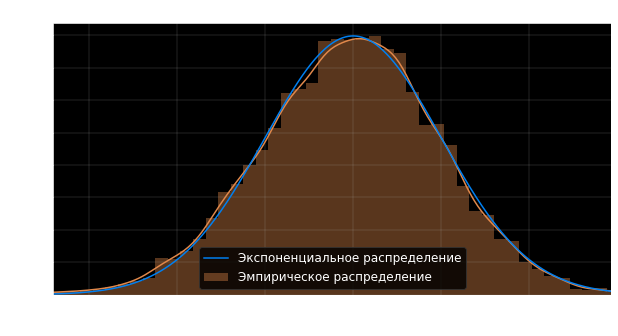

In [19]:
numpy.random.seed(8)

sample_size=2000
M = 10000
sample_distr = expon(loc=5, scale=300)

T_X = lambda sample: numpy.sqrt(sample_size) * (numpy.mean(sample) - sample_distr.mean()) / numpy.std(sample, ddof=1)
T_sample = sample_statistics(
    number_of_experiments=M, statistic_function=T_X,
    sample_size=sample_size, sample_distr=sample_distr)

pyplot.figure(figsize=(10, 5))
l_bound, r_bound = numpy.quantile(T_sample, [0.001, 0.999])


x = numpy.linspace(l_bound, r_bound, 1000)
pyplot.title(f'–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ T(X), sample size={sample_size}', fontsize=12)
distplot(T_sample, label='–≠–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ')
pyplot.plot(x, norm(0, 1).pdf(x), label='–≠–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ')
pyplot.legend(fontsize=12)
pyplot.xlabel(f'{name}', fontsize=12)
pyplot.xlim((l_bound, r_bound))
pyplot.ylabel('–ü–ª–æ—Ç–Ω–æ—Å—Ç—å', fontsize=12)
pyplot.grid(linewidth=0.2)
pyplot.show()

–ú—ã –≤–∏–¥–∏–º, —á—Ç–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å–æ–≤–ø–∞–ª–∏! –ê –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏, –≥–¥–µ –≤ –ø–µ—Ä–≤—ã–π —Ä–∞–∑ –±—ã–ª–∏ —Ä–∞–∑–ª–∏—á–∏—è –Ω–∞ –º–∞–ª–µ–Ω—å–∫–æ–π –≤—ã–±–æ—Ä–∫–µ?

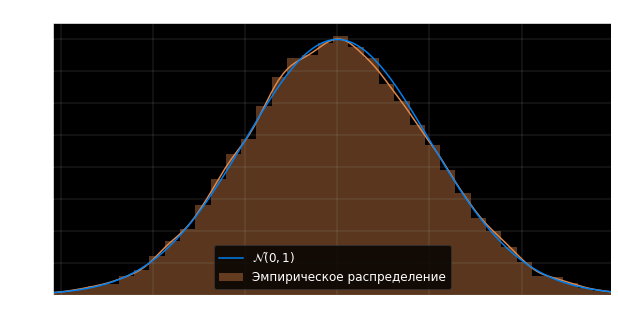

In [20]:
numpy.random.seed(8)

sample_size=2000
M = 30000
sample_distr = norm(loc=5, scale=300)

T_X = lambda sample: numpy.sqrt(sample_size) * (numpy.mean(sample) - sample_distr.mean()) / numpy.std(sample, ddof=1)
T_sample = sample_statistics(
    number_of_experiments=M, statistic_function=T_X,
    sample_size=sample_size, sample_distr=sample_distr)

pyplot.figure(figsize=(10, 5))
l_bound, r_bound = numpy.quantile(T_sample, [0.001, 0.999])


x = numpy.linspace(l_bound, r_bound, 1000)
pyplot.title(f'–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ T(X), sample size={sample_size}', fontsize=12)
distplot(T_sample, label='–≠–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ')
pyplot.plot(x, norm(0, 1).pdf(x), label='$\mathcal{N}(0, 1)$')
pyplot.legend(fontsize=12)
pyplot.xlabel(f'{name}', fontsize=12)
pyplot.xlim((l_bound, r_bound))
pyplot.ylabel('–ü–ª–æ—Ç–Ω–æ—Å—Ç—å', fontsize=12)
pyplot.grid(linewidth=0.2)
pyplot.show()

–¢–æ–∂–µ —Å–∞–º–æ–µ: —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –∏–∑ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è! –¢–æ –µ—Å—Ç—å –≤ –ø–µ—Ä–≤—ã–π —Ä–∞–∑ –Ω–∞–º –Ω–µ –ø–æ–≤–µ–∑–ª–æ, —á—Ç–æ —Ä–∞–∑–º–µ—Ä –≤—ã–±–æ—Ä–∫–∏ –±—ã–ª –º–∞–ª–µ–Ω—å–∫–∏–º(

### –î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª

–í—ã–≤–æ–¥–∏—Ç—Å—è —Ç–∞–∫–∂–µ, –∫–∞–∫ –∏ —É t-test:

$CI_{\mu} = \left(\overline X \pm \dfrac{z_{1 - \alpha/2} \sqrt{S^2}}{\sqrt{n}} \right)$.


In [21]:
sample = expon(scale=300).rvs(2000) # E sample = scale = 300
left_bound, right_bound = norm.interval(alpha=0.95, loc=numpy.mean(sample), scale=sem(sample)) 
print(f"CI = [{round(left_bound, 2)}, {round(right_bound, 2)}]")

CI = [289.96, 316.15]


----

–ù—É –≤–æ—Ç —Ç–µ–ø–µ—Ä—å –∫–∞–∂–µ—Ç—Å—è –∂–µ —Å–∞–º–æ–µ –≤—Ä–µ–º—è —Ä–µ—à–∞—Ç—å –∏—Å—Ö–æ–¥–Ω—É—é –∑–∞–¥–∞—á—É!

In [22]:
left_bound, right_bound = norm.interval(alpha=0.95, loc=numpy.mean(profits), scale=sem(profits)) 
print(f"CI = [{round(left_bound, 2)}, {round(right_bound, 2)}]")

CI = [14.04, 102.94]


–î–∞, –≤—ã—Ä—É—á–∫–∞ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞! –ó–Ω–∞—á–∏—Ç –º—ã –Ω–∞—à–ª–∏ –∏–Ω–≤–µ—Å—Ç–æ—Ä–æ–≤ –¥–ª—è –Ω–∞—à–µ–≥–æ —Å—Ç–∞—Ä—Ç–∞–ø–∞ :)

–ï–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω–æ–µ –Ω–æ: **–∞ –ø—Ä–∞–≤–¥–∞ –ª–∏, —á—Ç–æ –Ω–∞—à–∞ –≤—ã–±–æ—Ä–∫–∞ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –±–æ–ª—å—à–∞—è? –ò T'-test —Ç—É—Ç —Ä–∞–±–æ—Ç–∞–µ—Ç?** –û—Ç–≤–µ—Ç –Ω–∞ —ç—Ç–æ—Ç –≤–æ–ø—Ä–æ—Å –º—ã –ø–æ–ª—É—á–∏–º –Ω–∞ —Å–ª–µ–¥—É—é—â–µ–º –∑–∞–Ω—è—Ç–∏–∏.

## –ö–∞–∫–æ–π –∫—Ä–∏—Ç–µ—Ä–∏–π –≤ –∏—Ç–æ–≥–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ? T-test –∏–ª–∏ T'-test?

–î–ª—è –Ω–∞—á–∞–ª–∞ –æ–ø—Ä–µ–¥–µ–ª–∏–º—Å—è, –∫–æ–≥–¥–∞ –∫–∞–∫–æ–π –∫—Ä–∏—Ç–µ—Ä–∏–π –ª—É—á—à–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å?

1. –ï—Å–ª–∏ –≤—ã–±–æ—Ä–∫–∞ —Ä–∞–∑–º–µ—Ä–∞ 60, —Ç–æ —É–∂–µ $t_{59} \approx \mathcal{N}(0, 1)$. 
    - –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –°—Ç—å—é–¥–µ–Ω—Ç–∞ –∏ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ:

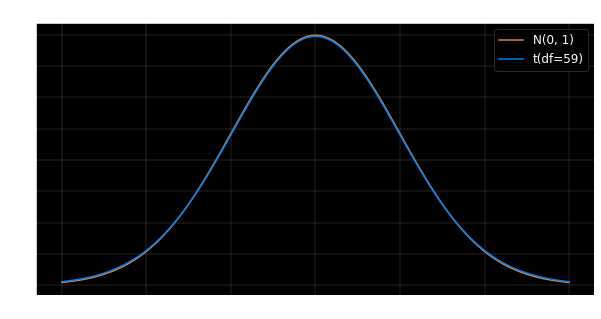

In [23]:
df = 59
t_dist = t(df=df)
z_dist = norm(loc=0, scale=1)

x = numpy.linspace(-3, 3, 100)
pyplot.figure(figsize=(10, 5))
pyplot.title(f'–ü–ª–æ—Ç–Ω–æ—Å—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ T –∏ N', fontsize=12)
pyplot.plot(x, z_dist.pdf(x), label='N(0, 1)')
pyplot.plot(x, t_dist.pdf(x), label=f't(df={df})')
pyplot.legend(fontsize=12)
pyplot.grid(linewidth=0.2)
pyplot.show()

- –ú—ã –≤–∏–¥–∏–º, —á—Ç–æ —ç—Ç–∏ 2 —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤–∏–∑—É–∞–ª—å–Ω–æ –ø–æ–ª–Ω–æ—Å—Ç—å—é —Å–æ–≤–ø–∞–¥–∞—é—Ç, –ø–æ—ç—Ç–æ–º—É –Ω–µ–≤–∞–∂–Ω–æ, –∫–∞–∫ –ø–æ—Å—á–∏—Ç–∞—Ç—å: —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ $T\sim \mathcal{N}(0, 1)$ –∏–ª–∏ $T\sim t_n$.
- **–ù–æ —ç—Ç–æ –Ω–µ –∑–Ω–∞—á–∏—Ç, —á—Ç–æ —Å N=60 T-test/T'-test —Ä–∞–±–æ—Ç–∞—é—Ç –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ!** –ï—Å–ª–∏ –≤—ã–±–æ—Ä–∫–∞ –Ω–µ –∏–∑ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è, –æ–Ω–∏ –æ–±–∞ –º–æ–≥—É—Ç –≤—Å–µ –µ—â–µ –æ—à–∏–±–∞—Ç—å—Å—è.

2. –ï—Å–ª–∏ –≤—ã–±–æ—Ä–∫–∞ –º–µ–Ω—å—à–µ 60, —Ç–æ –±–µ–∑–æ–ø–∞—Å–Ω–µ–π –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å t-test, –Ω–µ–∂–µ–ª–∏ t'-test.
    - **–£ T-test FPR –≤—Å–µ–≥–¥–∞ –±—É–¥–µ—Ç –º–µ–Ω—å—à–µ, —á–µ–º —É T'-test**. 
        - –ù–∞ FPR –≤–ª–∏—è–µ—Ç –ø—Ä–æ—Ü–µ–Ω—Ç —Å–ª—É—á–∞–µ–≤ `pvalue < alpha`. –£ t-test pvalue $\geq$ t'-test pvalue.
        - `pvalue = t_distr.cdf(x)` –∏–ª–∏ `pvalue = norm_dist.cdf(x)`. –ü–æ—ç—Ç–æ–º—É, —á–µ–º —Ç—è–∂–µ–ª–µ–µ —Ö–≤–æ—Å—Ç —É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è, —Ç–µ–º –±–æ–ª—å—à–µ p-value. –ê —Ç–µ–ø–µ—Ä—å –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –ø—Ä–∏–º–µ—Ä–µ:

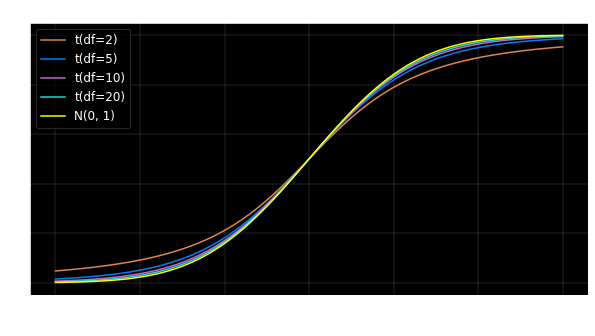

In [24]:
df_array = [2, 5, 10, 20]
x = numpy.linspace(-3, 3, 100)

pyplot.figure(figsize=(10, 5))
pyplot.title(f'CDF —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π T –∏ N', fontsize=12)
for df in df_array:
    t_dist = t(df=df)
    pyplot.plot(x, t_dist.cdf(x), label=f't(df={df})')

z_dist = norm(loc=0, scale=1)
pyplot.plot(x, z_dist.cdf(x), c='yellow', label='N(0, 1)')
pyplot.legend(fontsize=12)
pyplot.xlabel('X', fontsize=12)
pyplot.grid(linewidth=0.2)
pyplot.show()

–ö–∞–∫ –≤–∏–¥–Ω–æ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ, —á–µ–º –º–µ–Ω—å—à–µ —Å—Ç–µ–ø–µ–Ω—å —Å–≤–æ–±–æ–¥—ã, —Ç–µ–º –≤—ã—à–µ –ª–∏–Ω–∏—è –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ (–ø—Ä–∏ x < 0), –∞ –∑–Ω–∞—á–∏—Ç –∏ –±–æ–ª—å—à–µ cdf –ø—Ä–∏ —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ–º x. –ü–æ—ç—Ç–æ–º—É –∏ p-value –±—É–¥–µ—Ç –±–æ–ª—å—à–µ.


- –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –°—Ç—å—é–¥–µ–Ω—Ç–∞ —Å –±–µ—Å–∫–æ–Ω–µ—á–Ω–æ—Å—Ç—å—é —Å—Ç–µ–ø–µ–Ω–µ–π —Å–≤–æ–±–æ–¥—ã &mdash; —ç—Ç–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ: $t_{\infty} = \mathcal{N}(0, 1)$. –ü–æ—ç—Ç–æ–º—É `norm(0, 1).cdf(x) = t_distr(df=infinity).cdf(x) < t_distr(df=N).cdf(x)`.

–ü–æ—ç—Ç–æ–º—É, –µ—Å–ª–∏ –≤—ã–±–æ—Ä–∫–∞ –Ω–µ–±–æ–ª—å—à–∞—è, –±–µ–∑–æ–ø–∞—Å–Ω–µ–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å t-test. –ù–æ –≤—Å–µ –µ—â–µ –Ω–µ —Ñ–∞–∫—Ç, —á—Ç–æ –≤–∞—à –∫—Ä–∏—Ç–µ—Ä–∏–π –±—É–¥–µ—Ç –≤–∞–ª–∏–¥–µ–Ω!

---

–ü–æ—Å–º–æ—Ç—Ä–∏–º –µ—â–µ —Ä–∞–∑ –Ω–∞ —Ç–∞–±–ª–∏—á–∫—É 

|                          | –º–∞–ª–µ–Ω—å–∫–∞—è –≤—ã–±–æ—Ä–∫–∞ | –±–æ–ª—å—à–∞—è –≤—ã–±–æ—Ä–∫–∞ |
|--------------------------|-------------------|-----------------|
| –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ | t-test            | t-test, t'-test |
| –ª—é–±–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ      |                   | t'-test, t-test |

–ú—ã –≤–∏–¥–∏–º, —á—Ç–æ –º—ã –≤–µ–∑–¥–µ –º–æ–∂–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å t-test (–∞ t'-test –Ω–µ –≤—Å–µ–≥–¥–∞), –∏ –≤ —Å–ª—É—á–∞–µ –º–∞–ª–µ–Ω—å–∫–∏—Ö –≤—ã–±–æ—Ä–æ–∫ –æ–Ω –±–µ–∑–æ–ø–∞—Å–Ω–µ–µ. **–ü–æ—ç—Ç–æ–º—É t-test –∏ —Å—Ç–∞–ª –Ω–∞–º–Ω–æ–≥–æ –±–æ–ª–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–º, —á–µ–º t'-test**. –ù–æ t'-test –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ –º–æ–∂–µ—Ç –±—ã—Ç—å —Ç–æ–∂–µ –ø–æ–ª–µ–∑–µ–Ω: 
- –ù–µ –Ω–∞–¥–æ –¥—É–º–∞—Ç—å –ø—Ä–∏ —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏ –æ —Å—Ç–µ–ø–µ–Ω—è—Ö —Å–≤–æ–±–æ–¥—ã.
- –ù–∞–ø–∏—Å–∞—Ç—å —Ç–∞–∫–æ–π –∫—Ä–∏—Ç–µ—Ä–∏–π –Ω–∞ SQL –±—É–¥–µ—Ç —Å–∏–ª—å–Ω–æ –ø—Ä–æ—â–µ: –≤—ã –º–æ–∂–µ—Ç–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ç–∞–±–ª–∏—á–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ –∫–æ–¥–µ, —á—Ç–æ–±—ã –ø–æ–Ω—è—Ç—å, –æ—Ç–≤–µ—Ä–≥—Å—è –ª–∏ –∫—Ä–∏—Ç–µ—Ä–∏–π.
- –î–µ–ª–∞—Ç—å —Ä–∞–∑–ª–∏—á–Ω—ã–µ —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∏–µ –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –ø—Ä–æ—â–µ. 
- –í –Ω–µ–º —Å–ª–æ–∂–Ω–µ–µ –æ—à–∏–±–∏—Ç—å—Å—è –ø—Ä–∏ —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏.



## MDE

–í–µ—Ä–Ω–µ–º—Å—è –∫ –∑–∞–¥–∞—á–µ —Å–æ —Å—Ç–∞—Ä—Ç–∞–ø–æ–º. –ü—Ä–µ–¥—Å—Ç–∞–≤–∏–º, —á—Ç–æ –º—ã —Ö–æ—Ç–∏–º –∑–∞–ø—É—Å—Ç–∏—Ç—å –Ω–∞—à —Å—Ç–∞—Ä—Ç–∞–ø –≤ –Ω–æ–≤–æ–º –≥–æ—Ä–æ–¥–µ, –Ω–∞–ø—Ä–∏–º–µ—Ä –≤ –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–µ. **–í–æ–ø—Ä–æ—Å: –º–æ–∂–µ–º –ª–∏ –º—ã —Å–æ–±—Ä–∞—Ç—å –≤—ã–±–æ—Ä–∫—É –Ω–µ –∏–∑ 2000 –ª—é–¥–µ–π, –∫–∞–∫ –º—ã –¥–µ–ª–∞–ª–∏ —Å –ú–æ—Å–∫–≤–æ–π, –∞ –≤—Å–µ–≥–æ –∏–∑ 1000?**

–ß—Ç–æ –≤–æ–æ–±—â–µ –Ω–∞–º –º–µ—à–∞–µ—Ç –≤–∑—è—Ç—å —Å–ª–∏—à–∫–æ–º –º–∞–ª–µ–Ω—å–∫—É—é –≤—ã–±–æ—Ä–∫—É?
- –ù–∞–ø—Ä–∏–º–µ—Ä, –µ—Å–ª–∏ –º—ã –ø—Ä–æ–≤–µ—Ä—è–µ–º –Ω–∞—à —Å—Ç–∞—Ä—Ç–∞–ø –Ω–∞ 1-2 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, —Ç–æ –º—ã –Ω–∏—á–µ–≥–æ –Ω–µ –º–æ–∂–µ–º —Å–∫–∞–∑–∞—Ç—å –ø—Ä–æ –Ω–∞—à –∏—Å—Ç–∏–Ω–Ω—ã–π —ç—Ñ—Ñ–µ–∫—Ç, –æ–Ω –º–æ–∂–µ—Ç –±—ã—Ç—å –∫–∞–∫ –±–æ–ª—å—à–µ 0, —Ç–∞–∫ –∏ –º–µ–Ω—å—à–µ. –ë—É–¥–µ—Ç —Å–ª–∏—à–∫–æ–º —à–∏—Ä–æ–∫–∏–π –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª (–∏–∑-–∑–∞ –±–æ–ª—å—à–æ–π –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –≤ –≤—ã–±–æ—Ä–∫–µ, –∫–∞–∫ –º—ã –≤–∏–¥–µ–ª–∏ –≤ –ú–æ—Å–∫–≤–µ), –∏ –Ω–∞–º –Ω—É–∂–µ–Ω –æ–≥—Ä–æ–º–Ω—ã–π —ç—Ñ—Ñ–µ–∫—Ç, —á—Ç–æ–±—ã –µ–≥–æ –æ–±–Ω–∞—Ä—É–∂–∏—Ç—å: –Ω–∞–ø—Ä–∏–º–µ—Ä, 1–ú —Ä—É–±–ª–µ–π –ø—Ä–∏–±—ã–ª–∏.
    - –ï—â–µ, –≤–æ–∑–º–æ–∂–Ω–æ, –º—ã –Ω–µ –º–æ–∂–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∫—Ä–∏—Ç–µ—Ä–∏–π –Ω–∞ —Ç–∞–∫–æ–π –º–∞–ª–µ–Ω—å–∫–æ–π –≤—ã–±–æ—Ä–∫–µ, –Ω–æ —Å–µ–π—á–∞—Å –ø–æ—Å—á–∏—Ç–∞–µ–º, —á—Ç–æ t-test –∫—Ä–∏—Ç–µ—Ä–∏–π –≤–∞–ª–∏–¥–µ–Ω –¥–∞–∂–µ –Ω–∞ –º–∞–ª–µ–Ω—å–∫–æ–π –≤—ã–±–æ—Ä–∫–µ.
- –ê –µ—Å–ª–∏ –≤—ã–±–æ—Ä–∫–∞ —Å–æ—Å—Ç–æ—è–ª–∞ –±—ã –∏–∑ –±–µ—Å–∫–æ–Ω–µ—á–Ω–æ–≥–æ —á–∏—Å–ª–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, —Ç–æ –º—ã –º–æ–≥–ª–∏ –±—ã –∞–±—Å–æ–ª—é—Ç–Ω–æ —Ç–æ—á–Ω–æ —Å–∫–∞–∑–∞—Ç—å –∏—Å—Ç–∏–Ω–Ω—É—é –ø—Ä–∏–±—ã–ª—å –æ—Ç –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è, –¥–∞–∂–µ –µ—Å–ª–∏ –æ–Ω–∞ —Ä–∞–≤–Ω–∞ 1 –∫–æ–ø–µ–π–∫–µ.
- –ù–æ –æ–±–∞ —ç—Ç–∏ —Å–ª—É—á–∞—è –Ω–∞—Å –Ω–µ —É—Å—Ç—Ä–∞–∏–≤–∞—é—Ç :( –í –ø–µ—Ä–≤–æ–º - –º—ã –Ω–µ —Å–º–æ–∂–µ–º –∑–∞–ø—É—Å—Ç–∏—Ç—å —Å—Ç–∞—Ä—Ç–∞–ø –∏–∑-–∑–∞ —Å–ª–∏—à–∫–æ–º –±–æ–ª—å—à–æ–≥–æ —à—É–º–∞, –∞ –≤–æ –≤—Ç–æ—Ä–æ–º - –Ω–∞–º –Ω—É–∂–Ω–∞ –≤–µ—á–Ω–æ—Å—Ç—å, —á—Ç–æ–±—ã –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –Ω–∞—à—É –≥–∏–ø–æ—Ç–µ–∑—É.

–ò –∑–¥–µ—Å—å –Ω–∞–º –ø–æ–º–æ–∂–µ—Ç MDE (minimum detectable effect). –≠—Ç–æ —Ç–∞–∫–æ–µ –∏—Å—Ç–∏–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —ç—Ñ—Ñ–µ–∫—Ç–∞, —á—Ç–æ –Ω–∞—à —à–∞–Ω—Å –µ–≥–æ –æ–±–Ω–∞—Ä—É–∂–∏—Ç—å —Ä–∞–≤–µ–Ω $1-\beta$ –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ –Ω–∞—à–µ–≥–æ –∫—Ä–∏—Ç–µ—Ä–∏—è.
   - –ú—ã –º–æ–∂–µ–º –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å, –∫–∞–∫–æ–π —ç—Ñ—Ñ–µ–∫—Ç –º—ã —Å–º–æ–∂–µ–º –∑–∞–¥–µ—Ç–µ–∫—Ç–∏—Ä–æ–≤–∞—Ç—å –ø—Ä–∏ –¥–æ—Å—Ç–∞–≤–∫–µ 1000 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è–º, –∏ –æ—Ç —ç—Ç–æ–≥–æ —Ä–µ—à–∏—Ç—å, –ø–æ–¥—Ö–æ–¥–∏—Ç –Ω–∞–º —Ç–∞–∫–∞—è –≤—ã–±–æ—Ä–∫–∞, –∏–ª–∏ –Ω–µ—Ç. –ù–∞–ø—Ä–∏–º–µ—Ä:
        - –ú—ã –≤–∏–¥–∏–º, —á—Ç–æ MDE 100 —Ä—É–±–ª–µ–π. –¢–æ –µ—Å—Ç—å —Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é $1-\beta$ (–Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ 80%) –º—ã –µ–≥–æ –æ–±–Ω–∞—Ä—É–∂–∏–º, **–µ—Å–ª–∏ —Ç–∞–∫–æ–π —ç—Ñ—Ñ–µ–∫—Ç –±—É–¥–µ—Ç**. –ò —Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é 80% —Å—Ç–∞—Ä—Ç–∞–ø –∑–∞–ø—É—Å—Ç–∏—Ç—Å—è –≤ –ü–∏—Ç–µ—Ä–µ. –û—Ç–ª–∏—á–Ω–æ, —ç—Ç–æ –Ω–∞—Å —É—Å—Ç—Ä–∞–∏–≤–∞–µ—Ç, –º—ã –ø—Ä–æ–≤–µ—Ä—è–µ–º –≥–∏–ø–æ—Ç–µ–∑—É –Ω–∞ 1000 —á–µ–ª–æ–≤–µ–∫.
        - –ú—ã –≤–∏–¥–∏–º, —á—Ç–æ MDE 10000 —Ä—É–±–ª–µ–π. –≠—Ç–æ, –Ω–∞–æ–±–æ—Ä–æ—Ç, —Å–ª–∏—à–∫–æ–º –º–Ω–æ–≥–æ: —É –Ω–∞—Å 99% —Ç–æ–≤–∞—Ä–æ–≤ —Å—Ç–æ—è—Ç –º–µ–Ω—å—à–µ 1000 —Ä—É–±–ª–µ–π. –ú—ã –Ω–µ –Ω–∞–±–µ—Ä–µ–º —Ç–∞–∫–æ–π –ø—Ä–∏–±—ã–ª–∏, —Å—Ç–∞—Ä—Ç–∞–ø –Ω–µ–≤—ã–∏–≥—Ä—ã—à–Ω—ã–π, –Ω—É–∂–Ω–æ –±—Ä–∞—Ç—å –≤—ã–±–æ—Ä–∫—É –±–æ–ª—å—à–µ–≥–æ —Ä–∞–∑–º–µ—Ä–∞.

---


–û—Ç —á–µ–≥–æ –∑–∞–≤–∏—Å–∏—Ç MDE?
- –û—à–∏–±–∫–∞ 1 —Ä–æ–¥–∞, –∏–ª–∏ $\alpha$.
    - –ù–∞–ø—Ä–∏–º–µ—Ä, –ø—Ä–∏ $\alpha = 1$ –º—ã –Ω–∞–π–¥–µ–º —ç—Ñ—Ñ–µ–∫—Ç –∏ –ø—Ä–∏ —Ä–∞–∑–º–µ—Ä–µ –≤—ã–±–æ—Ä–∫–∏, —Ä–∞–≤–Ω–æ–π 1 (–º—ã –ø—Ä–æ—Å—Ç–æ –≤—Å–µ–≥–¥–∞ –±—É–¥–µ–º –æ—Ç–≤–µ—Ä–≥–∞—Ç—å 0 –≥–∏–ø–æ—Ç–µ–∑—É). –ê –ø—Ä–∏ $\alpha = 0$ –º—ã –Ω–∏–∫–æ–≥–¥–∞ –Ω–µ –∑–∞–¥–µ—Ç–µ–∫—Ç–∏—Ä—É–µ–º —ç—Ñ—Ñ–µ–∫—Ç.
- –ú–æ—â–Ω–æ—Å—Ç—å, –∏–ª–∏ $1 - \beta$.
    - –°–ª–µ–¥—É–µ—Ç –∏–∑ —Å–∞–º–æ–≥–æ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
- –û—Ç —à—É–º–∞ –≤ –¥–∞–Ω–Ω—ã—Ö, –∏–ª–∏ –æ—Ç –¥–∏—Å–ø–µ—Ä—Å–∏–∏.
    - –ß–µ–º –±–æ–ª–µ–µ —à—É–º–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ, –∫–∞–∫ –º—ã –∑–Ω–∞–µ–º, —Ç–µ–º —à–∏—Ä–µ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª. –ê –∑–Ω–∞—á–∏—Ç —Å–ª–æ–∂–Ω–µ–µ —Ç–æ—á–Ω–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å —Ä–∞–º–∫–∏ –¥–ª—è –∏—Å—Ç–∏–Ω–Ω–æ–≥–æ —ç—Ñ—Ñ–µ–∫—Ç–∞, –ø–æ—ç—Ç–æ–º—É –∏ MDE –±—É–¥–µ—Ç –±–æ–ª—å—à–µ.
- –û—Ç —Ä–∞–∑–º–µ—Ä–∞ –≤—ã–±–æ—Ä–∫–∏.
    - –ù–∞—Å –∏–Ω—Ç–µ—Ä–µ—Å—É–µ—Ç –Ω–µ –ø—Ä–æ—Å—Ç–æ –¥–∏—Å–ø–µ—Ä—Å–∏—è –≤ –¥–∞–Ω–Ω—ã—Ö, –∞ –¥–∏—Å–ø–µ—Ä—Å–∏—è —Å—Ä–µ–¥–Ω–µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è: –æ–Ω–∞ –ø–æ —Ç–æ–π –∂–µ –ª–æ–≥–∏–∫–µ –¥–æ–ª–∂–Ω–∞ –±—ã—Ç—å –∫–∞–∫ –º–æ–∂–Ω–æ –º–µ–Ω—å—à–µ. –ê —á—Ç–æ —Ç–∞–∫–æ–µ–µ –¥–∏—Å–ø—Ä—Å–∏—è —Å—Ä–µ–¥–Ω–µ–≥–æ? –≠—Ç–æ $\dfrac{\sigma^2}{N}$, –ø–æ—ç—Ç–æ–º—É MDE —Ç–∞–∫–∂–µ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç —Ä–∞–∑–º–µ—Ä–∞ –≤—ã–±–æ—Ä–∫–∏.



–¢–µ–ø–µ—Ä—å –¥–∞–≤–∞–π—Ç–µ –≤—ã–≤–µ–¥–µ–º —Ñ–æ—Ä–º—É–ª—É –∏—Å—Ö–æ–¥—è –∏–∑ —Ç–æ–≥–æ, —á—Ç–æ –º—ã –∑–Ω–∞–µ–º –≤—Å–µ —ç—Ç–∏ 4 –ø–∞—Ä–∞–º–µ—Ç—Ä–∞.


-----
–î–ª—è –Ω–∞—á–∞–ª–∞ –æ–ø—Ä–µ–¥–µ–ª–∏–º—Å—è —Å –ø—Ä–æ–≤–µ—Ä—è–µ–º–æ–π –≥–∏–ø–æ—Ç–µ–∑–æ–π:  
- $H_0: \mu_0 = 0\ vs. \ H_1: \mu_0 > 0$

–û–±–æ–∑–Ω–∞—á–∏–º 
- $S^2_{\mu} := \dfrac{S^2}{N}$ &mdash; –æ—Ü–µ–Ω–∫–∞ –¥–∏—Å–ø–µ—Ä—Å–∏–∏ —Å—Ä–µ–¥–Ω–µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è.
- $S_{\mu} = \sqrt{\dfrac{S^2}{N}}$ &mdash; –æ—Ü–µ–Ω–∫–∞ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–≥–æ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è —Å—Ä–µ–¥–Ω–µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è, –∏–ª–∏ SEM.

–¢–µ–ø–µ—Ä—å, –º—ã –∑–Ω–∞–µ–º, —á—Ç–æ 
- $\overline X \sim \mathcal{N}(\mu, S^2_{\mu})$

–ù–∞–º –Ω–∞–¥–æ –Ω–∞–π—Ç–∏ $MDE=m$, —Ç–∞–∫–æ–µ, —á—Ç–æ:

- –µ—Å–ª–∏ $\overline X \sim \mathcal{N}(m, S^2_{\mu})$, —Ç–æ –≤ $1-\beta$ –ø—Ä–æ—Ü–µ–Ω—Ç–µ —Å–ª—É—á–∞–µ–≤ –¥–ª—è –Ω–µ–≥–æ –æ—Ç–≤–µ—Ä–≥–Ω–µ—Ç—Å—è –∫—Ä–∏—Ç–µ—Ä–∏–π. –ü—Ä–æ–≤–µ—Ä—è–µ–º –º–æ—â–Ω–æ—Å—Ç—å (–∑–µ–ª–µ–Ω–∞—è –ø–ª–æ—â–∞–¥—å –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ).
- –µ—Å–ª–∏ $\overline X \sim \mathcal{N}(0, S^2_{\mu})$, —Ç–æ –∫—Ä–∏—Ç–µ—Ä–∏–π –æ—Ç–≤–µ—Ä–≥–Ω–µ—Ç—Å—è –¥–ª—è –Ω–µ–≥–æ –≤ $\alpha$ –ø—Ä–æ—Ü–µ–Ω—Ç–µ–µ —Å–ª—É—á–∞–µ–≤. –ü—Ä–æ–≤–µ—Ä—è–µ–º FPR (–∫—Ä–∞—Å–Ω–∞—è –ø–ª–æ—â–∞–¥—å –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ).


<img src="https://raw.githubusercontent.com/dimalunin2016/pictures/main/download-3.png" width="1500" height="200" />



–¢–æ –µ—Å—Ç—å:

- –ü—É—Å—Ç—å $B(X): P_{H_0}(\overline X > B(X)) = \alpha$. $B(X)$ &mdash; –ì—Ä–∞–Ω–∏—Ü–∞ –∫—Ä–∏—Ç–∏—á–µ—Å–∫–æ–π –æ–±–ª–∞—Å—Ç–∏, –∫—Ä–∞—Å–Ω–∞—è –≥—Ä–∞–Ω–∏—Ü–∞ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ.
- –¢–æ–≥–¥–∞ $P_{H_1}(\overline X > B(X)) = 1-\beta$. –ó–µ–ª–µ–Ω–∞—è –æ–±–ª–∞—Å—Ç—å –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ. 
    - –ò–ª–∏, —á—Ç–æ –∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ: $P_{H_1}(\overline X - m > B(X) - m) = 1-\beta$.
    - –û–±–æ–∑–Ω–∞—á–∏–º $\xi := \overline X - m$. $P_{H_0}(\xi > B(X) - m) = 1-\beta$. –†—ã–∂–∞—è –ø–ª–æ—Ç–Ω–æ—Å—Ç—å –ø–æ–ª—É—á–∞–µ—Ç—Å—è –∏–∑ —Å–∏–Ω–µ–π –≤—ã—á–∏—Ç–∞–Ω–∏–µ–º m. $\xi$ –∏–∑ —Ä—ã–∂–µ–π –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏, $\overline X$ –∏–∑ —Å–∏–Ω–µ–π.

–ù–∞–¥–æ —Ä–µ—à–∏—Ç—å —ç—Ç–∏ 2 —É—Ä–∞–≤–Ω–µ–Ω–∏—è –∏ –º—ã –ø–æ–ª—É—á–∏–º –≤—ã—Ä–∞–∂–µ–Ω–∏–µ $m$ —á–µ—Ä–µ–∑ –≤—Å–µ 4 –ø–∞—Ä–∞–º–µ—Ç—Ä–∞.

1. $B(X)$ –º—ã –∏—Ç–∞–∫ –∑–Ω–∞–µ–º. –ü—Ä–∏ $H_0$ –Ω–∞—à –∫—Ä–∏—Ç–µ—Ä–∏–π –∏–º–µ–µ—Ç —Å–ª–µ–¥—É—é—â–∏–π –≤–∏–¥: $\left\{T(X) \geq z_{1 - \alpha} \right\} \Leftrightarrow  \left\{\sqrt{N}\dfrac{\overline X}{\sqrt{S^2}} \geq z_{1 - \alpha} \right\} \Leftrightarrow B(X) = z_{1 - \alpha}\sqrt{\dfrac{S^2}{N}} = z_{1 - \alpha}S_{\mu} $

2. $P_{H_0}(\xi > z_{1 - \alpha}S_{\mu} - m) = 1-\beta$. –†–∞–±–æ—Ç–∞—Ç—å —Å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º $\mathcal{N}(0, S^2_{\mu})$ –Ω–µ –æ—á–µ–Ω—å —É–¥–æ–±–Ω–æ, –≥–æ—Ä–∞–∑–¥–æ –ø—Ä–æ—â–µ —Å $\mathcal{N}(0, 1)$. –î–ª—è —ç—Ç–æ–≥–æ –ø–µ—Ä–µ—Ö–æ–¥–∞ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –ø–µ—Ä–µ–π—Ç–∏ –æ—Ç $\xi \rightarrow \dfrac{\xi}{S_{\mu}}$ –ø–æ —Å–≤–æ–π—Å—Ç–≤–∞–º –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.

- –û–±–æ–∑–Ω–∞—á–∏–º $\eta := \dfrac{\xi}{S_{\mu}}$. –¢–æ–≥–¥–∞ 
$$\begin{align}
    &P_{H_0}(\xi > z_{1 - \alpha}S_{\mu} - m) =\\ 
    &P_{H_0}(\dfrac{\xi}{S_{\mu}} > \dfrac{z_{1 - \alpha}S_{\mu} - m}{S_{\mu}}) =\\
    & P_{\mathcal{N}(0, 1)}(\eta > z_{1 - \alpha} - \dfrac{m}{S_{\mu}}) = 1-\beta
\end{align}
$$
- $\Phi(C) = P(\eta < C)$. –¢–æ–≥–¥–∞ 
    $$\begin{align}
    &1 - \Phi \left(z_{1 - \alpha} - \dfrac{m}{S_{\mu}} \right) = 1-\beta \Leftrightarrow\\ &z_{1 - \alpha} - \dfrac{m}{S_{\mu}} = z_{\beta},
    \end{align}
    $$ 
    –≥–¥–µ $z_{\beta} = \Phi^{-1}(\beta)$ &mdash; –∫–≤–∞–Ω—Ç–∏–ª—å $\beta$ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.
    - –í –∫–æ–Ω—Ü–µ –º—ã –∫–∞–∫ —Ä–∞–∑ –ø–æ–ª—å–∑—É–µ–º—Å—è —Ç–µ–º, —á—Ç–æ $\eta \sim \mathcal{N}(0, 1)$.
- –§–∏–Ω–∞–ª—å–Ω–æ –º—ã –ø–æ–ª—É—á–∞–µ–º, —á—Ç–æ: $m = (z_{1 - \alpha} - z_{\beta}) \cdot S_{\mu} = |\text{—Ä–∞—Å–ø. —Å–∏–º–º–µ—Ç—Ä–∏—á–Ω–æ}| = (z_{1 - \alpha} + z_{1 - \beta}) \cdot \sqrt{\dfrac{S^2}{N}}$.

### –ò—Ç–æ–≥–æ:

- $\text{MDE} = (z_{1 - \alpha} + z_{1 - \beta}) \cdot \sqrt{\dfrac{S^2}{N}}$

----


–í–µ—Ä–Ω–µ–º—Å—è –∫ —Å—Ç–∞—Ä—Ç–∞–ø—É. –ú—ã –æ–ø—Ä–µ–¥–µ–ª–∏–ª–∏—Å—å, —á—Ç–æ N = 1000, $\alpha=5$%, $1-\beta=80$%, –∞ –∫–∞–∫ —É–∑–Ω–∞—Ç—å $S^2$? 

–ù–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ –µ—Å—Ç—å 3 —Å–ø–æ—Å–æ–±–∞: 
- –û—Ü–µ–Ω–∏—Ç—å –Ω–∞ –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∏—Ö –¥–∞–Ω–Ω—ã—Ö. –í –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ —ç—Ç–æ –Ω–µ –ø–æ–¥—Ö–æ–¥–∏—Ç, –ø–æ—Ç–æ–º—É —á—Ç–æ —Ä–∞–Ω–µ–µ —Å—Ç–∞—Ä—Ç–∞–ø–∞ –≤ –ü–∏—Ç–µ—Ä–µ –Ω–µ –±—ã–ª–æ.
- –û—Ü–µ–Ω–∏—Ç—å –ø–æ –ø–æ—Ö–æ–∂–∏–º –¥–∞–Ω–Ω—ã–º. –ù–∞–ø—Ä–∏–º–µ—Ä, –≤ –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ, –æ—Ü–µ–Ω–∏—Ç—å –¥–∏—Å–ø–µ—Ä–∏—Å—é –ø–æ –ú–æ—Å–∫–≤–µ.
- –ö–∞–∫-—Ç–æ —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∏ –æ—Ü–µ–Ω–∏—Ç—å. –°–∞–º—ã–π –ø–ª–æ—Ö–æ–π —Å–ø–æ—Å–æ–±, –∫–æ—Ç–æ—Ä—ã–π —Ä–∞–±–æ—Ç–∞–µ—Ç, –µ—Å–ª–∏ –ø–µ—Ä–≤—ã–µ 2 –Ω–µ –ø–æ–º–æ–≥–∞—é—Ç.


–ü–æ—Å–º–æ—Ç—Ä–∏–º —Ç–µ–ø–µ—Ä—å MDE –≤ –Ω–∞—à–µ–π –∑–∞–¥–∞—á–µ.

In [25]:
N = 1000
S2 = numpy.var(profits)
alpha = 0.05
beta = 1 - 0.8

MDE = (norm().ppf(1-alpha) + norm().ppf(1 - beta)) * numpy.sqrt(S2/N)
print(f"MDE –ø—Ä–∏ N={N}: {MDE}")

MDE –ø—Ä–∏ N=1000: 126.08268390090282


–ê –∑–Ω–∞—á–∏—Ç –º—ã –º–æ–∂–µ–º —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞—Ç—å –Ω–∞ —Ç–æ—á–Ω–æ—Å—Ç—å –ª–∏—à—å –≤ 126 —Ä—É–±.

----
–î–ª—è –Ω–∞—Å —ç—Ç–æ —Å–ª–∏—à–∫–æ–º –±–æ–ª—å—à–æ–π MDE: —Ö–æ—á–µ—Ç—Å—è, —á—Ç–æ–±—ã –æ–Ω –±—ã–ª $\leq$ 100 —Ä—É–±–ª–µ–π, –º—ã –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º, —á—Ç–æ —ç—Ç–æ –±–æ–ª–µ–µ –≤–µ—Ä–æ—è—Ç–Ω—ã–π –∏—Å—Ç–∏–Ω–Ω—ã–π —ç—Ñ—Ñ–µ–∫—Ç, –∏—Å—Ö–æ–¥—è –∏–∑ –æ–ø—ã—Ç–∞ —Å –ú–æ—Å–∫–≤–æ–π.


–î–∞–≤–∞–π—Ç–µ —Ç–µ–ø–µ—Ä—å —Ä–µ—à–∏–º –æ–±—Ä–∞—Ç–Ω—É—é –∑–∞–¥–∞—á—É: –ú—ã –∑–Ω–∞–µ–º MDE=100—Ä—É–±, $\alpha=5$%, $1-\beta=80$, S^2%, —á–µ–º—É —Ä–∞–≤–Ω–æ $N$? –í—ã–≤–µ–¥–µ–º –µ–≥–æ –∏–∑ —Ñ–æ—Ä–º—É–ª—ã MDE:

$N = \left(\dfrac{z_{1 - \alpha} + z_{1 - \beta}}{\text{MDE}}\right)^2 S^2$

In [26]:
S2 = numpy.var(profits)
alpha = 0.05
beta = 1 - 0.8
mde = 100

N = ((norm().ppf(1-alpha) + norm().ppf(1 - beta)) / mde)**2 * S2
N = int(N) + 1
print(f'–ú–∏–Ω–∏–º–∞–ª—å–Ω—ã–π —Ä–∞–∑–º–µ—Ä –≤—ã–±–æ—Ä–∫–∏: {N}')

–ú–∏–Ω–∏–º–∞–ª—å–Ω—ã–π —Ä–∞–∑–º–µ—Ä –≤—ã–±–æ—Ä–∫–∏: 1590


–¢–æ–≥–¥–∞ –Ω–∞–º –Ω–∞–¥–æ –≤–∑—è—Ç—å –≤—ã–±–æ—Ä–∫—É —Ä–∞–∑–º–µ—Ä–∞ –ø—Ä–∏–º–µ—Ä–Ω–æ 1600 —á–µ–ª–æ–≤–µ–∫. 

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, —Å–¥–µ–ª–∞–≤ –ø–æ–¥–≥–æ—Ç–æ–≤–∏—Ç–µ–ª—å–Ω—É—é —Ä–∞–±–æ—Ç—É, –º—ã –ø–æ–Ω—è–ª–∏, —á—Ç–æ 1000 —á–µ–ª–æ–≤–µ–∫ —ç—Ç–æ –º–∞–ª–æ, 2000 —á–µ–ª–æ–≤–µ–∫ &mdash; –º–Ω–æ–≥–æ –¥–ª—è –Ω–∞—à–µ–≥–æ MDE. –ò –ø–æ–¥–æ–±—Ä–∞–ª–∏ –∏–¥–µ–ª–∞—å–Ω—ã–π —Ä–∞–∑–º–µ—Ä –≤—ã–±–æ—Ä–∫–∏.

# –î–≤—É–≤—ã–±–æ—Ä–æ—á–Ω—ã–π T-test. –ó–∞–¥–∞—á–∞ AB-—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è

> üìà **–ó–∞–¥–∞—á–∞**
>
> –£ –Ω–∞—Å –Ω–∞ —Å–∞–π—Ç–µ –ê–≤–∏—Ç–æ –µ—Å—Ç—å —É—Å–ª—É–≥–∏ –ø—Ä–æ–¥–≤–∏–∂–µ–Ω–∏—è. –ú—ã —Ö–æ—Ç–∏–º –Ω–∞—á–∞—Ç—å –¥–∞–≤–∞—Ç—å –Ω–∞ –Ω–∏—Ö —Å–∫–∏–¥–∫–∏, —á—Ç–æ–±—ã –ø—Ä–∏–≤–ª–µ—á—å –±–æ–ª—å—à–µ –ª—é–¥–µ–π –∏ –Ω–∞—á–∞—Ç—å –±–æ–ª—å—à–µ –∑–∞—Ä–∞–±–∞—Ç—ã–≤–∞—Ç—å. –î–ª—è —ç—Ç–æ–≥–æ –±—ã–ª–æ —Ä–µ—à–µ–Ω–æ –ø—Ä–æ–≤–µ—Å—Ç–∏ AB —Ç–µ—Å—Ç:
> –û–¥–Ω–æ–π –ø–æ–ª–æ–≤–∏–Ω–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –º—ã –Ω–µ –≤—ã–¥–∞–ª–∏ —Å–∫–∏–¥–æ–∫, –∞ –≤–æ –≤—Ç–æ—Ä–æ–π –ø–æ–ª–æ–≤–∏–Ω–µ –º—ã –≤—ã–¥–∞–ª–∏ —Å–∫–∏–¥–∫–∏ –≤—Å–µ–º –Ω–æ–≤—ã–º –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è–º. –ù–∞–¥–æ –ø–æ–Ω—è—Ç—å, —Å—Ç–∞–ª–∏ –ª–∏ –º—ã –±–æ–ª—å—à–µ –∑–∞—Ä–∞–±–∞—Ç—ã–≤–∞—Ç—å?


–î–ª—è —Ä–µ—à–µ–Ω–∏—è —ç—Ç–æ–π –∑–∞–¥–∞—á–∏ –º—ã –Ω–µ –º–æ–∂–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –æ–¥–Ω–æ–≤—ã–±–æ—Ä–æ—á–Ω—ã–π t-test. –í —ç—Ç–æ—Ç —Ä–∞–∑ —É –Ω–∞—Å 2 –≤—ã–±–æ—Ä–∫–∏ $A$ &mdash; –∫–æ–Ω—Ç—Ä–æ–ª—å, –∏ $B$ &mdash; —Ç–µ—Å—Ç.

–ù–∞—à–∞ –≥–∏–ø–æ—Ç–µ–∑–∞ –∑–≤—É—á–∏—Ç —Ç–∞–∫: 
$H_0: E A = E B\ vs. H_1: E A < E B$

1. **–û–±–µ –≤—ã–±–æ—Ä–∫–∏ –Ω–æ—Ä–º–∞–ª—å–Ω—ã**. –¢–æ–≥–¥–∞ –µ—Å—Ç—å 2 –∫—Ä–∏—Ç–µ—Ä–∏—è –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –Ω–∞—à–∏—Ö –∑–Ω–∞–Ω–∏–π –ø—Ä–æ –¥–∏—Å–ø–µ—Ä—Å–∏—é:
    - $\sigma^2_A = \sigma^2_B$. 
    
    –¢–æ–≥–¥–∞:
        - $S^2_{full} = \dfrac{(N - 1)S^2_A + (M - 1)S^2_B}{N + M - 2}$, –≥–¥–µ N, M -  —Ä–∞–∑–º–µ—Ä –∫–æ–Ω—Ç—Ä–æ–ª—è –∏ —Ç–µ—Å—Ç–∞ —Å–æ–æ—Ç–≤–µ—Å—Ç–≤–µ–Ω–Ω–æ. –ê –∫—Ä–∏—Ç–µ—Ä–∏–π –≤—ã–≥–ª—è–¥–∏—Ç —Å–ª–µ–¥—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º:
        - $T(A, B) = \dfrac{\overline A - \overline B}{S^2_{full}\sqrt{1/N + 1/M}} \overset{H_0}{\sim} T_{n + m - 2}$
   
    - $\sigma^2_A \neq \sigma^2_B$. 
    
    –¢–æ–≥–¥–∞:
        - $T(A, B) = \dfrac{\overline A - \overline B}{\sqrt{S^2_{A}/N + S^2_{B}/M}} \overset{H_0}{\sim} T_{v}$
            - –≥–¥–µ $v = \dfrac{\left(\dfrac{S^2_{A}}{N} + \dfrac{S^2_{B}}{M} \right)^2}{\left(\dfrac{(S^2_{A})^2}{N^2(N - 1)} + \dfrac{(S^2_{B})^2}{M^2(M-1)} \right)} $
2. **–•–æ—Ç—è –±—ã 1 –≤—ã–±–æ—Ä–∫–∞ –Ω–µ–Ω–æ—Ä–º–∞–ª—å–Ω–∞**. –¢–æ–≥–¥–∞ –≤–±–æ–π –≤—Å—Ç—É–ø–∞–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–∞—è –∞–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏—è –ø—Ä–∏ –±–æ–ª—å—à–æ–º —Ä–∞–∑–º–µ—Ä–µ –≤—ã–±–æ—Ä–æ–∫, –∫—Ä–∏—Ç–µ—Ä–∏–π T'-test:
    - $T(A, B) = \dfrac{\overline A - \overline B}{\sqrt{S^2_{A}/N + S^2_{B}/M}} \overset{H_0}{\sim} \mathcal{N}(0, 1)$
    - –°–æ–≥–ª–∞—Å–∏—Ç–µ—Å—å, –∑–¥–µ—Å—å –Ω–∞–º–Ω–æ–≥–æ –ø—Ä–æ—â–µ —Ñ–æ—Ä–º—É–ª–∞, —á–µ–º —Ç–µ, —á—Ç–æ –≤—ã—à–µ? :) –ü–æ—ç—Ç–æ–º—É –¥–ª—è AB-—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ –ª–µ–≥—á–µ —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å –∏–º–µ–Ω–Ω–æ t'-–∫—Ä–∏—Ç–µ—Ä–∏–π, –≥–¥–µ –≤—ã –Ω–µ –æ—à–∏–±–µ—Ç–µ—Å—å.
    
    
-----

Python-–±–∏–±–ª–∏–æ—Ç–µ–∫–∏:

- `scipy.stats.ttest_ind` &mdash; 2-–≤—ã–±–æ—Ä–æ—á–Ω—ã–π t-test [–∫—Ä–∏—Ç–µ—Ä–∏–π](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind)
- `CompareMeans` &mdash; [–∫–ª–∞—Å—Å](https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.CompareMeans.html) –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã—Ö –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–≤ —É t-test.

In [27]:
numpy.random.seed(42)
X = expon(scale=1100).rvs(1000)
Y = norm(loc=980, scale=30).rvs(1000)

ttest_ind(X, Y, equal_var=False, alternative='greater')

Ttest_indResult(statistic=2.5645688722251325, pvalue=0.005237676356845092)

In [28]:
ttest_ind(X, Y, equal_var=False).pvalue

0.010475352713690184

In [29]:
# –î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª

cm = CompareMeans(DescrStatsW(X), DescrStatsW(Y))
print(cm.tconfint_diff(usevar='unequal'))

(20.380593037118373, 153.1987434094658)


# –û —á–µ–º –≤—ã–∂–Ω–æ –ø–æ–º–Ω–∏—Ç—å

–ü—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ t-test –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤, –∫–∞–∫ –æ–¥–Ω–æ–≤—ã–±–æ—Ä–æ—á–Ω–æ–≥–æ, —Ç–∞–∫ –∏ –¥–≤—É–≤—ã–±–æ—Ä–æ—á–Ω–æ–≥–æ, –≤–∞–∂–Ω–æ –ø–æ–º–Ω–∏—Ç—å, —á—Ç–æ:

- **–≠–ª–µ–º–µ–Ω—Ç—ã –≤—ã–±–æ—Ä–æ–∫ –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã!**
    - –ù–∞–ø—Ä–∏–º–µ—Ä, –≤–∞—à–∞ –≤—ã–±–æ—Ä–∫–∞ –Ω–µ –º–æ–∂–µ—Ç—å —Å–æ–¥–µ—Ä–∂–∞—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ –∑–∞–∫–∞–∑–æ–≤ –æ–¥–Ω–æ–≥–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è. –û–Ω–∏ –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å –∞–≥—Ä–µ–≥–∏—Ä–æ–≤–∞–Ω–Ω—ã, –∏–Ω–∞—á–µ –∫—Ä–∏—Ç–µ—Ä–∏–∏ –±—É–¥—É—Ç –Ω–µ–≤–∞–ª–∏–¥–Ω—ã!
- –í –¥–≤—É–±—ã—Ä–æ—á–Ω–æ–º –∫—Ä–∏—Ç–µ—Ä–∏–∏ **–≤—ã–±–æ—Ä–∫–∏ —Ç–µ—Å—Ç–∞ –∏ –∫–æ–Ω—Ç—Ä–æ–ª—è –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã!**
    - –ò–Ω–∞—á–µ –∫—Ä–∏—Ç–µ—Ä–∏–∏ —Ç–æ—á–Ω–æ —Ç–∞–∫–∂–µ –±—É–¥—É—Ç –Ω–µ–≤–∞–ª–∏–¥–Ω—ã.
    
–ë–æ–ª–µ–µ –ø–æ–¥—Ä–æ–±–Ω–æ –∫ —á–µ–º—É –ø—Ä–∏–≤–æ–¥—è—Ç –æ—à–∏–±–∫–∏ —Å –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å—é –≤—ã–±–æ—Ä–æ–∫ –º—ã —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Å–ª–µ–¥—É—é—â–∏—Ö –ª–µ–∫—Ü–∏—è—Ö.

## –ò—Ç–æ–≥

–ù–∞ —ç—Ç–æ–π –ª–µ–∫—Ü–∏–∏ –º—ã —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–ª–∏
- –ö–∞–∫ —Å—Ç—Ä–æ–∏—Ç—å –∫—Ä–∏—Ç–µ—Ä–∏–∏ –¥–ª—è –æ—Ü–µ–Ω–∫–∏ —Å—Ä–µ–¥–Ω–µ–≥–æ –≤ —Å–ª—É—á–∞–µ, –µ—Å–ª–∏ –≤—ã –Ω–µ –∑–Ω–∞–µ—Ç–µ –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è?
    
|                          | –º–∞–ª–µ–Ω—å–∫–∞—è –≤—ã–±–æ—Ä–∫–∞ | –±–æ–ª—å—à–∞—è –≤—ã–±–æ—Ä–∫–∞ |
|--------------------------|-------------------|-----------------|
| –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ | t-test               | t-test, t'-test |
| –ª—é–±–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ      |  | t'-test, t-test |


- –í—ã–≤–µ–ª–∏ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã 2-–º—è —Å–ø–æ—Å–æ–±–∞–º–∏.
- –ü–æ–∫–∞–∑–∞–ª–∏, —á—Ç–æ –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é –ª—É—á—à–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å T-test, –∫–∞–∫ –±–æ–ª–µ–µ –±–µ–∑–æ–ø–∞—Å–Ω—ã–π –∫—Ä–∏—Ç–µ—Ä–∏–π. 
- –í—ã–≤–µ–ª–∏ —Ñ–æ—Ä–º—É–ª—É MDE –¥–ª—è –æ–¥–Ω–æ–≤—ã–±–æ—Ä–æ—á–Ω–æ–≥–æ –∫—Ä–∏—Ç–µ—Ä–∏—è.
    - –ê —Ç–∞–∫–∂–µ –≤–≤–µ–ª–∏ —Ñ–æ—Ä–º—É–ª—É –¥–ª—è –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞–∑–º–µ—Ä–∞ –≤—ã–±–æ—Ä–∫–∏.
- –ü–æ—Å–º–æ—Ç—Ä–µ–ª–∏, –∫–∞–∫–∏–µ –µ—Å—Ç—å –∫—Ä–∏—Ç–µ—Ä–∏–∏ –¥–ª—è AB-—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è.
- –£—Ç–æ—á–Ω–∏–ª–∏, –∫–∞–∫–∏–µ —É—Å–ª–æ–≤–∏—è –Ω—É–∂–Ω–æ –Ω–∞–ª–æ–∂–∏—Ç—å –Ω–∞ –≤—ã–±–æ—Ä–∫—É, —á—Ç–æ–±—ã –∫—Ä–∏—Ç–µ—Ä–∏–∏ –º–æ–∂–Ω–æ –±—ã–ª–æ –±—ã –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ –ø—Ä–∏–º–µ–Ω—è—Ç—å.

## –î–æ–ø —Å–µ–∫—Ü–∏—è

### –ö–∞–∫ –≤—ã–±—Ä–∞—Ç—å $S^2$?

–í –Ω–∞—á–∞–ª–µ –ª–µ–∫—Ü–∏–∏ –º—ã –≤–∑—è–ª–∏ $\widehat{\sigma^2} = S^2 = \dfrac{1}{n - 1}\underset{i=1}{\overset{n}{\sum}}(X_i - \overline X)^2$. –ê –º–æ–∂–Ω–æ –ª–∏ –±—Ä–∞—Ç—å –¥—Ä—É–≥—É—é —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –¥–∏—Å–ø–µ—Ä—Å–∏–∏?

- –î–ª—è T-test –Ω–µ—Ç, —Ç–∞–º –≤—Å–µ —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–æ. –¢–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∞—è —Ñ–æ—Ä–º—É–ª–∞ —Å t-—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º –ø–æ–¥—Ö–æ–¥–∏—Ç —Ç–æ–ª—å–∫–æ –¥–ª—è –æ–ø–∏—Å–∞–Ω–Ω–æ–π –æ—Ü–µ–Ω–∫–∏ –¥–∏—Å–ø–µ—Ä—Å–∏–∏.
- –î–ª—è T'-test –∂–µ –≤—Å–µ –ø—Ä–æ—â–µ: *–º—ã –º–æ–∂–µ–º –≤–∑—è—Ç—å –ª—é–±—É—é –æ—Ü–µ–Ω–∫—É* $\widehat{\sigma^2}$, –∫–æ—Ç–æ—Ä–∞—è —è–≤–ª—è–µ—Ç—Å—è —Å–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ–π –æ—Ü–µ–Ω–∫–æ–π $\sigma^2$.
    - –í —ç—Ç–æ–º —Å–ª—É—á–∞–µ, –ø—Ä–æ–≤–µ–¥—è —Ç–æ –∂–µ –¥–æ–∫-–≤–æ, –∫–æ—Ç–æ—Ä–æ–µ –º—ã –≤—ã–≤–æ–¥–∏–ª–∏ —Ä–∞–Ω–µ–µ –¥–ª—è T'-–∫—Ä–∏—Ç–µ—Ä–∏—è, –º—ã –ø–æ–ª—É—á–∏–º, —á—Ç–æ —Ç–æ—á–Ω–æ —Ç–∞–∫–∂–µ $T(X) = \sqrt{n}\dfrac{\overline X - \mu_0}{\widehat{\sigma^2}} \rightarrow \mathcal{N}(0, 1)$. –¢–∞–∫ —á—Ç–æ –ø—Ä–∏ –±–æ–ª—å—à–∏—Ö N –Ω–µ–≤–∞–∂–Ω–æ, –∫–∞–∫—É—é —Å–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω—É—é –æ—Ü–µ–Ω–∫—É –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –±—Ä–∞—Ç—å.
    - –ö–∞–∫–∏–µ –æ—Ü–µ–Ω–∫–∏ —è–≤–ª—è—é—Ç—Å—è —Å–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω—ã–º–∏?
        - $\widehat{\sigma^2} = \dfrac{1}{n}\underset{i=1}{\overset{n}{\sum}}(X_i - \overline X)^2$
        - $\widehat{\sigma^2} = \dfrac{1}{n + 1}\underset{i=1}{\overset{n}{\sum}}(X_i - \overline X)^2$
        - –¢–∞–∫ —á—Ç–æ –Ω–µ–≤–∞–∂–Ω–æ, –Ω–∞ —á—Ç–æ –≤—ã –¥–µ–ª–∏—Ç–µ: –Ω–∞ $\dfrac{1}{n}$ –∏–ª–∏ $\dfrac{1}{n-1}$, –ø—Ä–∏ –±–æ–ª—å—à–∏—Ö n –Ω–µ—Ç —Ä–∞–∑–Ω–∏—Ü—ã.
        
 

       
### –°–º—ã—Å–ª —Å—Ç–µ–ø–µ–Ω–∏ —Å–≤–æ–±–æ–¥—ã

–î–∞–≤–∞–π—Ç–µ —Ä–∞–∑–±–∏—Ä–∞—Ç—å—Å—è, —á—Ç–æ —ç—Ç–æ –∑–∞ –∑–≤–µ—Ä—å —Ç–∞–∫–æ–π. –î–ª—è –Ω–∞—á–∞–ª–∞ –º—ã –ø–æ–π–º–µ–º, –∫–∞–∫ –æ–Ω–æ —Ä–∞–±–æ—Ç–∞–µ—Ç –¥–ª—è —Ö–∏ –∫–≤–∞–¥—Ä–∞—Ç:

1. $\eta = \dfrac{(n - 1)\cdot S^2_X}{\sigma^2} = \underset{i=1}{\overset{n}{\sum}}\left(\xi_i - \overline \xi \right)^2 \sim \chi^2_{n-1}$, –≥–¥–µ $\xi_i \sim \mathcal{N}(0, 1)$
    
    - –í—Å–ø–æ–º–Ω–∏–º, —á—Ç–æ $\underset{i=1}{\overset{n}{\sum}}\left(\xi_i - \mu \right)^2 = \underset{i=1}{\overset{n}{\sum}}\xi_i^2 \sim \chi^2_n$, —ç—Ç–æ –æ–¥–Ω–æ –∏–∑ –≤–æ–∑–º–æ–∂–Ω—ã—Ö –æ–ø—Ä–µ–¥–µ–ª–µ–π $\chi_2$. –ò —Ç—É—Ç —Å—Ç–µ–ø–µ–Ω–µ–π —Å–≤–æ–±–æ–¥—ã —Ä–∞–≤–Ω–æ —á–∏—Å–ª—É –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –≤ —Å–∏—Å—Ç–µ–º–µ: n. –ö–∞–∂–¥–æ–µ $\xi_i$ —Å–ª—É—á–∞–π–Ω–æ –∏ –Ω–µ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –æ—Å—Ç–∞–ª—å–Ω—ã—Ö.
    - –ù–æ –∫–∞–∫ —Ç–æ–ª—å–∫–æ –º—ã –∑–∞–º–µ–Ω—è–µ–º $\mu$ –Ω–∞ $\overline \xi$, —Ç–æ –º—ã –≥–æ–≤–æ—Ä–∏–º, —á—Ç–æ –º—ã —Ñ–∏–∫—Å–∏—Ä—É–µ–º $\overline \xi$. –¢–∞–∫ —á—Ç–æ —Ç–µ–ø–µ—Ä—å –Ω–∞—à–∏ $\xi_i$ —Ç–∞–∫–∏–µ, —á—Ç–æ –æ–Ω–∏ –¥–∞–ª–∏ –æ—Ü–µ–Ω–∫—É $\mu$ –∫–∞–∫ $\overline \xi$ –∏ –Ω–∏–∫–∞–∫—É—é –¥—Ä—É–≥—É—é.
    - –ê –µ—Å–ª–∏ –º—ã –∑–Ω–∞–µ–º —Å—Ä–µ–¥–Ω–µ–µ —Å–ª—É—á–∞–π–Ω—ã—Ö –≤–µ–ª–∏—á–∏–Ω, —Ç–æ —Ç–µ–ø–µ—Ä—å –º—ã –º–æ–∂–µ–º —Å–≤–æ–±–æ–¥–Ω–æ –º–µ–Ω—è—Ç—å –ª–∏—à—å $n-1$ –∑–Ω–∞—á–µ–Ω–∏–µ $\xi_i: i \in {1, ..., n-1}$. –û—Å—Ç–∞–≤—à–µ–µ—Å—è –∑–Ω–∞—á–µ–Ω–∏–µ –∑–∞—Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–æ, –∏ –Ω–∞–ø—Ä—è–º—É—é —Å—á–∏—Ç–∞–µ—Ç—Å—è –∏–∑ —Å—Ä–µ–¥–Ω–µ–≥–æ –∏ n-1 –æ—Å—Ç–∞–≤—à–µ–≥–æ—Å—è –∑–Ω–∞—á–µ–Ω–∏—è.



2. $T = \sqrt{n}\dfrac{\overline X - \mu_0}{\sqrt{S^2}} = \dfrac{\xi}{\sqrt{\dfrac{\eta}{n-1}}} \sim t_{n - 1}$
    - –ó–¥–µ—Å—å —Å—Ç–µ–ø–µ–Ω—å —Å–≤–æ–±–æ–¥—ã —Ç–∞–∫–∂–µ –±–µ—Ä–µ—Ç—Å—è –∏–∑ —Ö–∏-–∫–≤–∞–¥—Ä–∞—Ç, —É –∫–æ—Ç–æ—Ä–æ–≥–æ –æ–Ω–∞ —Ç–∞–∫–∞—è, –ø–æ—Ç–æ–º—É —á—Ç–æ –º—ã –æ—Ü–µ–Ω–∏–ª–∏ –º–∞—Ç. –æ–∂ –∏ –Ω–∞ —ç—Ç–æ –ø–æ—Ç—Ä–∞—Ç–∏–ª–∏ 1 —Å—Ç–µ–ø–µ–Ω—å —Å–≤–æ–±–æ–¥—ã. 

**–ò—Ç–æ–≥–æ** –ø—Ä–æ—Å—Ç–∞—è –∏–Ω—Ç–µ—Ä–ø—Ä–∏—Ç–∞—Ü–∏—è —Å—Ç–µ–ø–µ–Ω–∏ —Å–≤–æ–±–æ–¥—ã &mdash; —á–∏—Å–ª–æ —Å–≤–æ–±–æ–¥–Ω–æ –º–µ–Ω—è–µ–º—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –≤ —Å—Ç–∞—Ç–∏c—Ç–∏–∫–µ.